# Seoul Bike Sharing Demand Prediction

# Project Aim

This Seoul Bike Sharing Demand Prediction machine learning project aims to predict demand for bike-sharing based on historical data. The dataset used contains data from a bike-sharing system including the date, hour, weather conditions, temperature, and the number of bikes rented.

The aim of the project is to use this data to build a predictive model that can accurately estimate bike rental demand for any given hour. The model will be evaluated on its accuracy in predicting the number of bikes rented during a given hour.

The data set included Rental bike information. As part of the analysis, descriptive statistics were calculated for each variable, and visualizations were created to explore the relationships between various variables. To get insight from the dataset, we built a variety of charts, including a distplot, count plot, bar plot, line plot, heatmap, and boxplot.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("SeoulBikeData.csv",parse_dates=['Date'],encoding="ISO-8859-1")
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

Using parse_dates feature 'Date' coverted to datetime64 from object datatype

# Data Inspection

In [3]:
# Checking shape of the dataset
df.shape

(8760, 14)

In [4]:
# Checking columns name of dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [5]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
# Basic description of Dataset
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

# Handling Duplicate Values 

In [7]:
# Checking for number of duplicated values
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


# Handling Null / Missing Values

In [8]:
# Checking for number of null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# Handling Outliers

# Categorical variables

In [9]:
# Find categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*50)
print(categorical_variables)

There are 4 categorical variables
----------------------------------------------------------------------------------------------------
['Date', 'Seasons', 'Holiday', 'Functioning Day']


In [10]:
# Finding numerical variables
numerical_variables=[var for var in df.columns if var not in categorical_variables]
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*50)
print(numerical_variables)

There are 10 numerical variables
----------------------------------------------------------------------------------------------------
['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


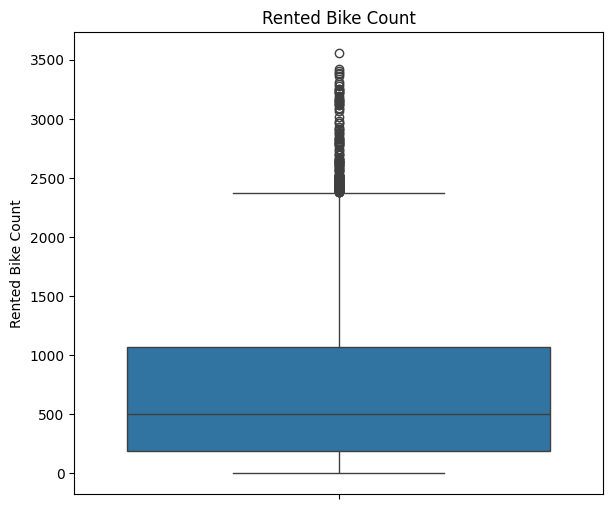

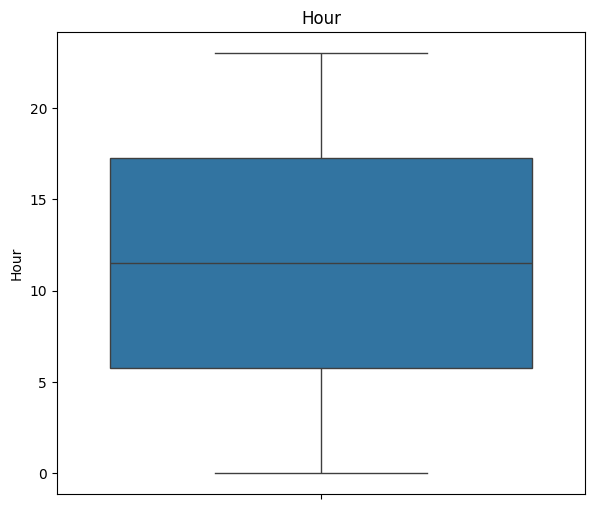

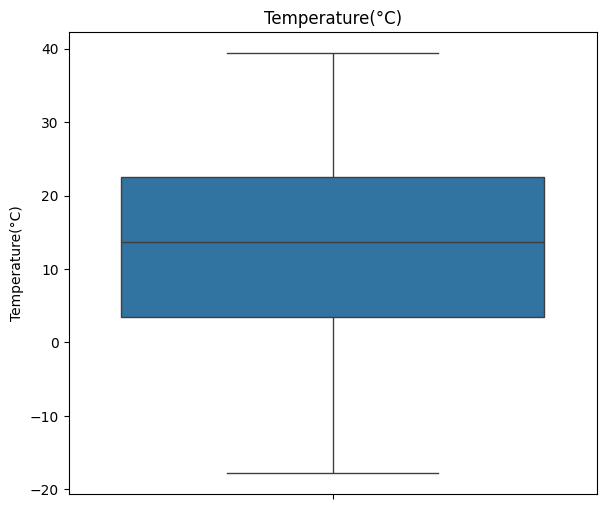

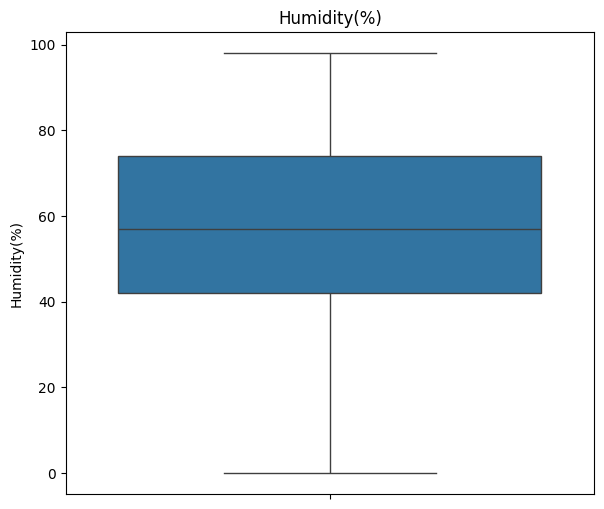

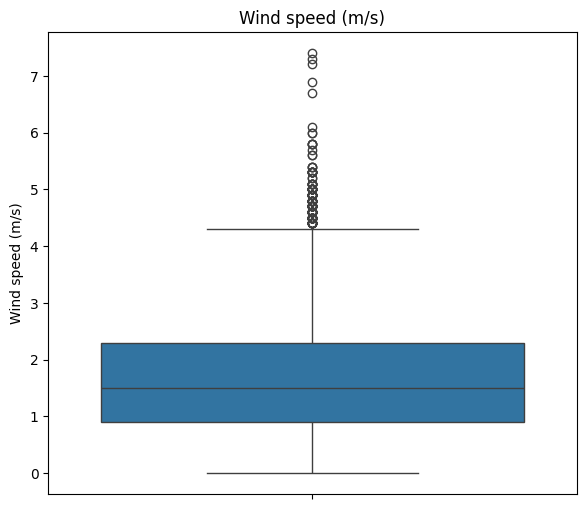

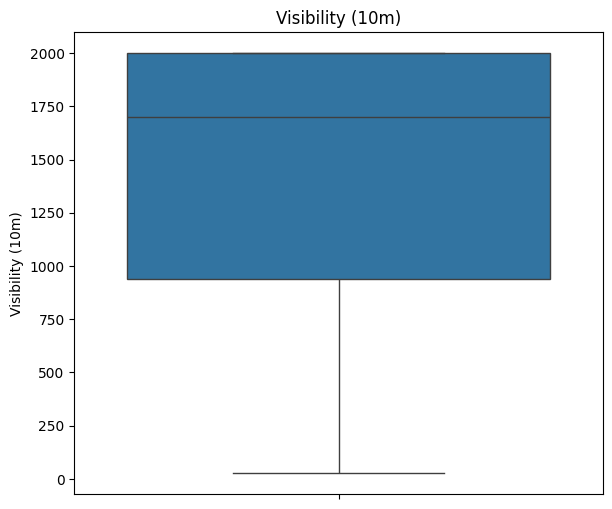

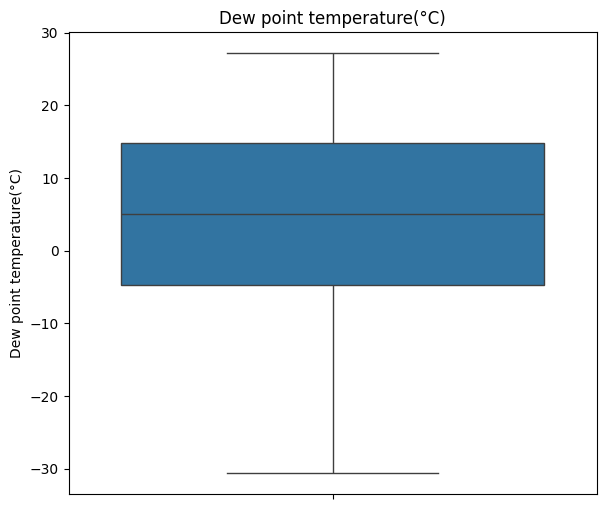

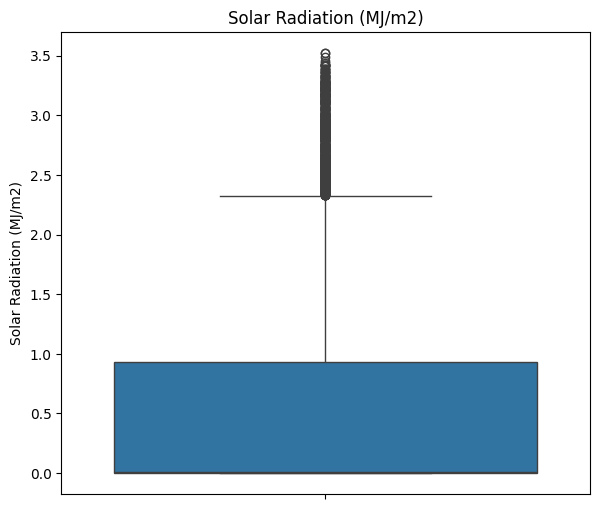

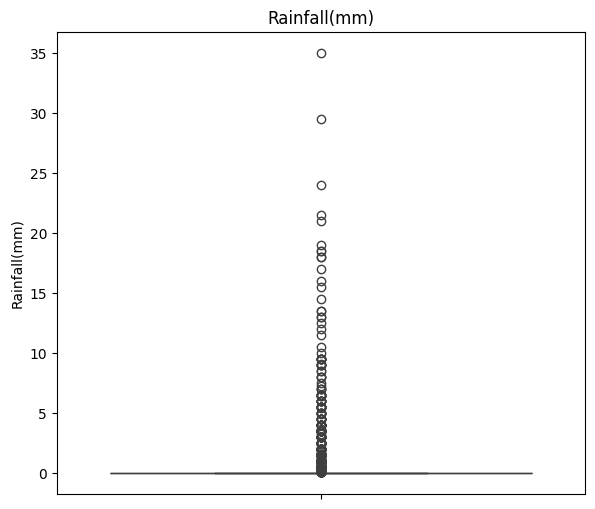

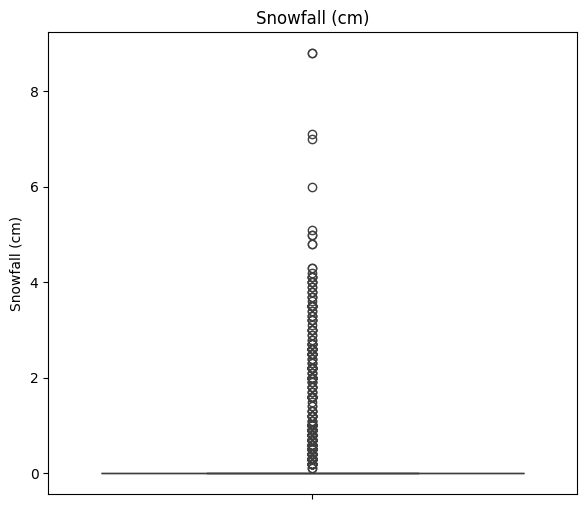

In [11]:
# Removing "Date" variable from numerical variable
num_var=[var for var in df[numerical_variables].columns if var not in ["Date"]]

# Plotting Box and Distribution plot 
for var in num_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

The variables Rented Bike Count, Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall (mm) and Snowfall (cm) have outliers. Rainfall (mm) and Snowfall (cm) have a flat interquartile range; it is best to remove those columns.

In [12]:
# Using Interquartile Range for removing outliers from numerical variables

# Defining outlier features
outlier_var = ['Rented Bike Count', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)']

# Iterating through each variable
for i in outlier_var:
    # Calculating the first quartile (Q1), third quartile (Q3), and IQR
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    
    # Defining upper and lower limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Selecting rows within the defined limits and updating the DataFrame
    df = df[(df[i] >= lower_limit) & (df[i] <= upper_limit)]


In [13]:
# Final Basic description of dataset
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        7760.000000  7760.000000      7760.000000  7760.000000   
mean          640.715722    11.180026        11.784497    60.372938   
std           596.374532     7.217458        11.696221    20.112849   
min             0.000000     0.000000       -17.800000     0.000000   
25%           174.000000     5.000000         2.700000    45.000000   
50%           419.000000    10.000000        12.000000    60.000000   
75%           977.000000    18.000000        21.200000    76.000000   
max          2375.000000    23.000000        39.000000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       7760.000000       7760.000000                7760.000000   
mean           1.599446       1411.176031                   3.680902   
std            0.938520        620.941392                  13.210630   
min            0.000000         27.000000                 -30.500000   
25%            0.900000        879.000000                  -5.400000   
50%            1.400000       1651.000000                   4.400000   
75%            2.200000       2000.000000                  14.700000   
max            4.300000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              7760.000000   7760.000000    7760.000000  
mean                  0.366546      0.164639       0.083015  
std                   0.600553      1.187901       0.461915  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.000000      0.000000       0.000000  
75%                   0.540000      0.000000       0.000000  
max                   2.250000     35.000000       8.800000

# Data Wrangling and Feature Engineering

In [14]:
# Assuming 'Date' is in string format with day/month/year format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Now you can perform feature engineering on the 'Date' column
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year


In [15]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  day  month  year  
0             Yes    1     12  2017  
1             Yes    1     12  2017  
2             Yes    1     12  2017  
3             Yes    1     12  2017  
4             Yes    1     12  2017

In [16]:
# Dropping original  Date feature after performing feature engineering
df.drop(columns='Date', axis=1, inplace=True)

In [17]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          7760 non-null   int64  
 1   Hour                       7760 non-null   int64  
 2   Temperature(°C)            7760 non-null   float64
 3   Humidity(%)                7760 non-null   int64  
 4   Wind speed (m/s)           7760 non-null   float64
 5   Visibility (10m)           7760 non-null   int64  
 6   Dew point temperature(°C)  7760 non-null   float64
 7   Solar Radiation (MJ/m2)    7760 non-null   float64
 8   Rainfall(mm)               7760 non-null   float64
 9   Snowfall (cm)              7760 non-null   float64
 10  Seasons                    7760 non-null   object 
 11  Holiday                    7760 non-null   object 
 12  Functioning Day            7760 non-null   object 
 13  day                        7760 non-null   int32  
 1

In [18]:
# Checking dataset
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  day  \
0           0.0            0.0  Winter  No Holiday             Yes    1   
1           0.0            0.0  Winter  No Holiday             Yes    1   
2           0.0            0.0  Winter  No Holiday             Yes    1   
3           0.0            0.0  Winter  No Holiday             Yes    1   
4           0.0            0.0  Winter  No Holiday             Yes    1   

   month  year  
0     12  2017  
1     12  2017  
2     12  2017  
3     12  2017  
4     12  2017

# Exploratory data analysis

# Univariate Analysis

In [19]:
# Obtaining target variable

# Excluding variables with more than 15 unique values
excluded_variables = [var for var in df.columns if len(df[var].value_counts()) > 10]

# Including variables that are not in the excluded list
target_variables = [var for var in df.columns if var not in excluded_variables]

# Defining r to autofit the number and size of plots with 2 columns
r = int(len(target_variables) / 2 + 1)


In [20]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

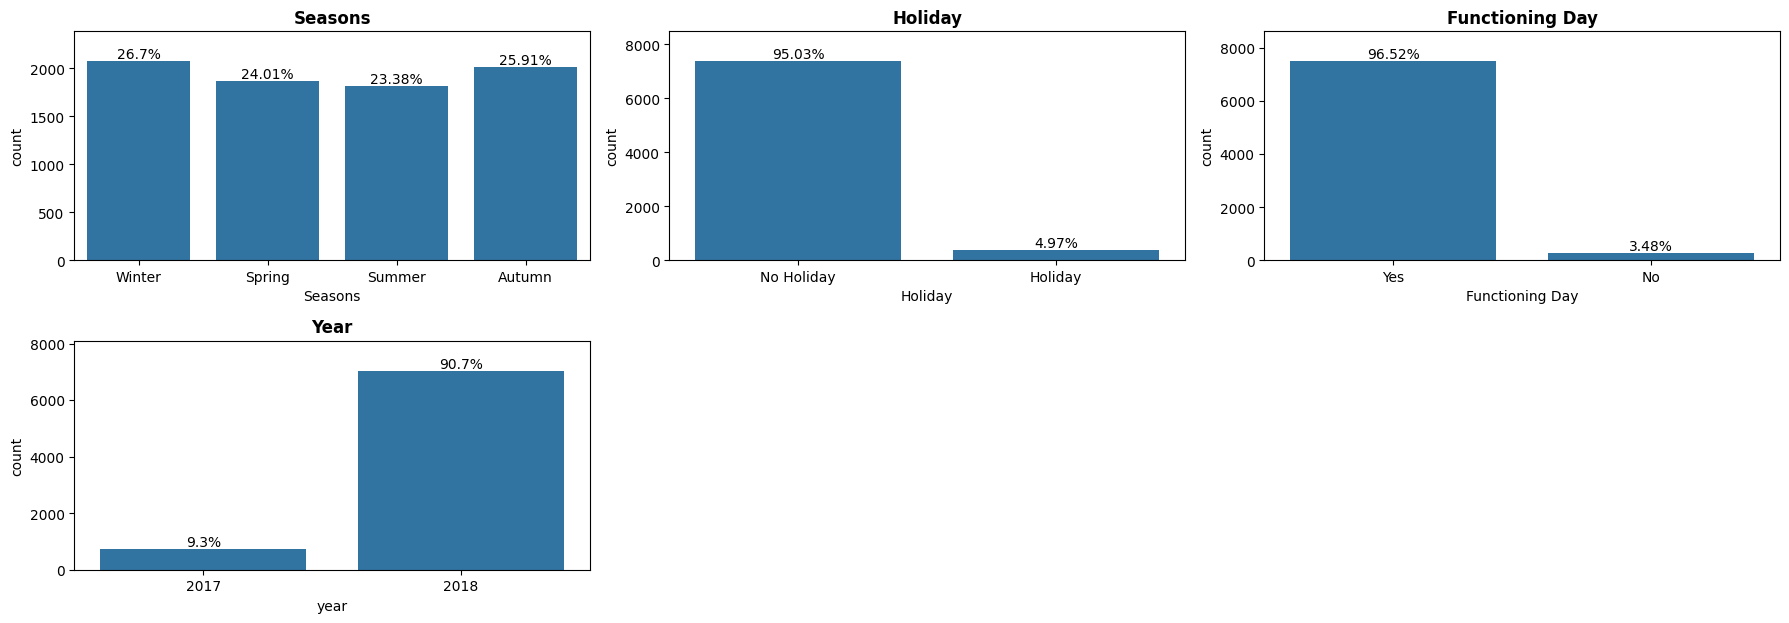

In [21]:
# Plotting the countplots for each variable in target_variables
plt.figure(figsize=(18,r*3))
for n,var in enumerate(target_variables):
    plot = plt.subplot(r,3,n+1)
    sns.countplot(x=df[var]).margins(y=0.15)
    plt.title(f'{var.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

# Observations :

Customers favour rental motorcycles equally in all seasons.

When there are no holidays, customers choose to rent motorcycles. Customers hardly ever use the bikes they rent while traveling on holiday.

Nearly all consumers preferred to rent bikes during functional hours.

Bicycle rentals are popular all month long.

Renting bicycles was not very popular in 2017, but it increased by 83.02 percent in 2018

# Bivariate Analysis

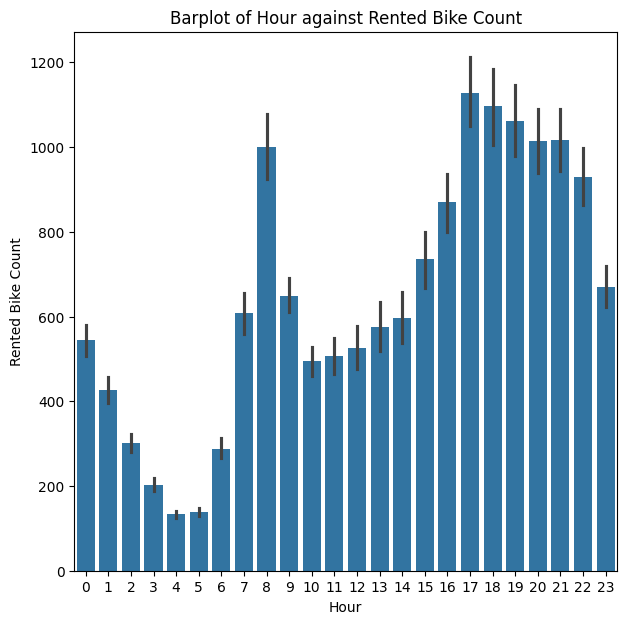

In [22]:
# Plotting graph of 'Hour' against 'Rented Bike Count'
plt.figure(figsize=(7,7))
ax=sns.barplot(x="Hour", y="Rented Bike Count",data=df)
ax.set_title('Barplot of Hour against Rented Bike Count')
plt.show()

# Observations :

At night, customers do not prefer to use rented bikes.

Customers do not prefer rented bikes in the mornings 4 and 5, but from 7, 8, and 9, the use of rented bikes increases, possibly due to working people going to the office, and it is the same in the evenings 5, 6, and 7, because people are travelling from the office to home. Overall, the rented bike was the most frequently used during office in and out times.

Customers mostly use rented bikes for transportation in the evening.

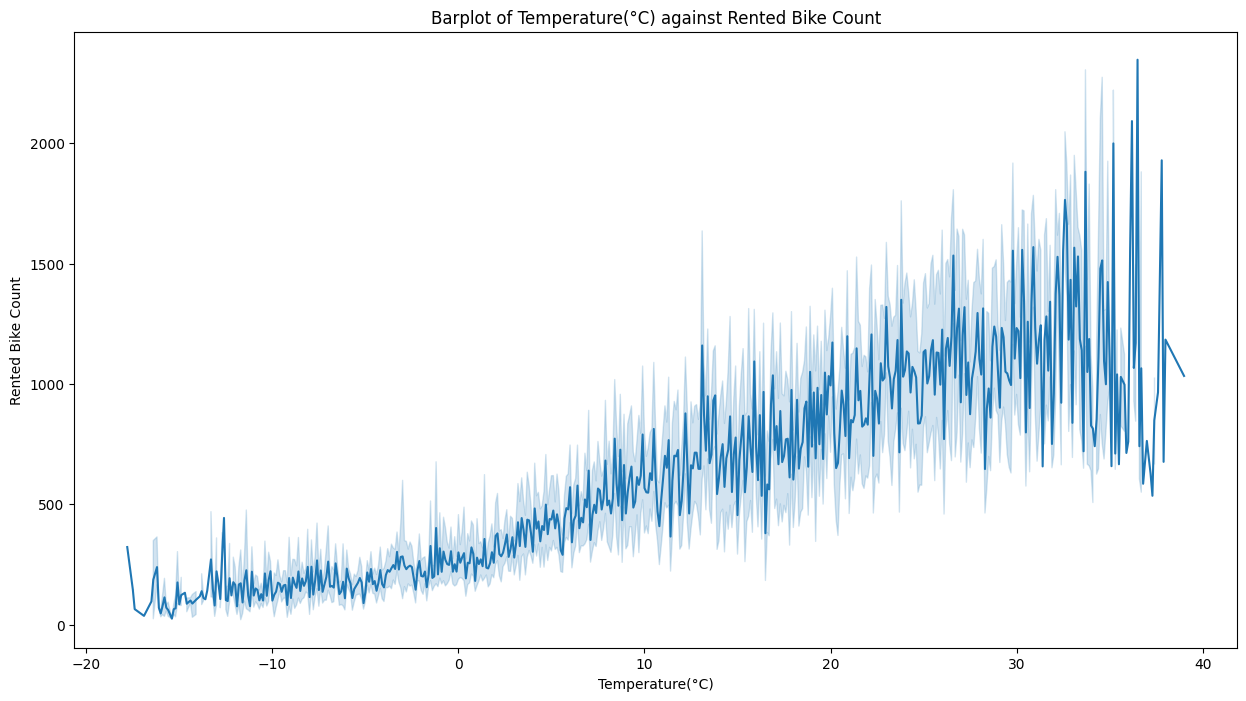

In [23]:
# Checking effect of temperature(°C) on rented bike use
plt.figure(figsize=(15,8))
ax=sns.lineplot(x="Temperature(°C)", y="Rented Bike Count",data=df)
ax.set_title('Barplot of Temperature(°C) against Rented Bike Count')
plt.show()

# Observations:

Most customers use a rented bike when the temperature is normal, but when the weaher is cold or hot, people do not use a rented bike.

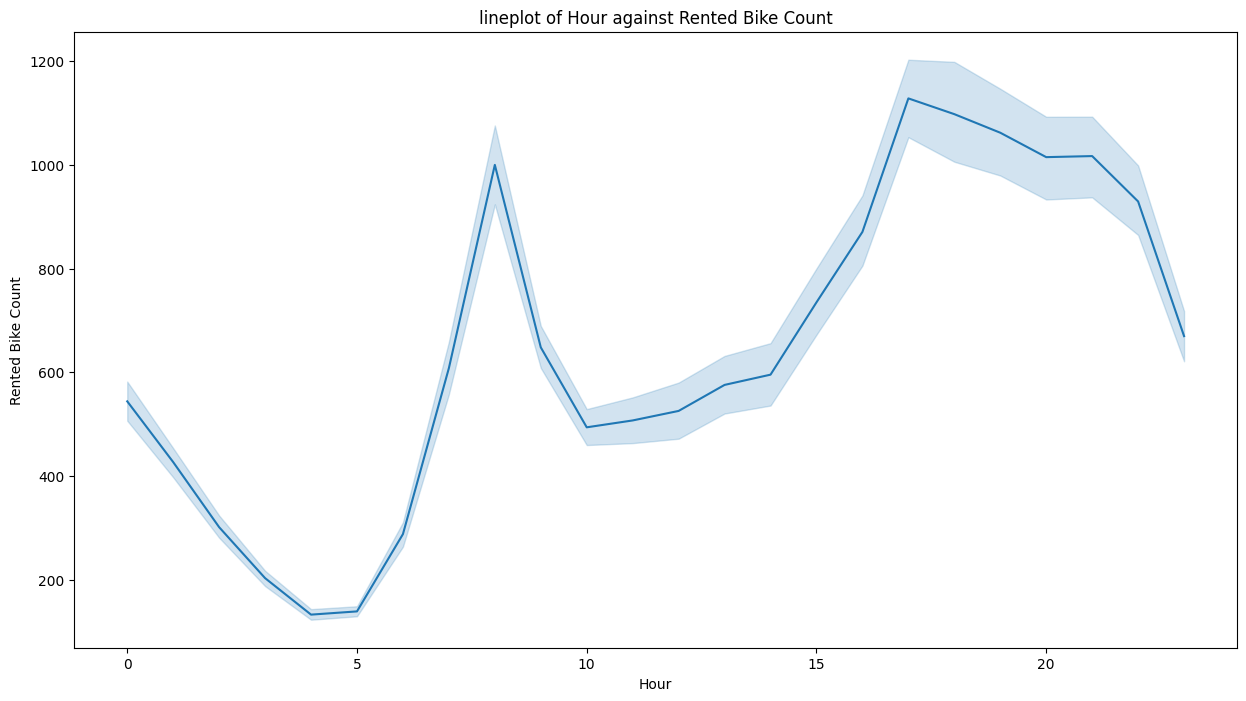

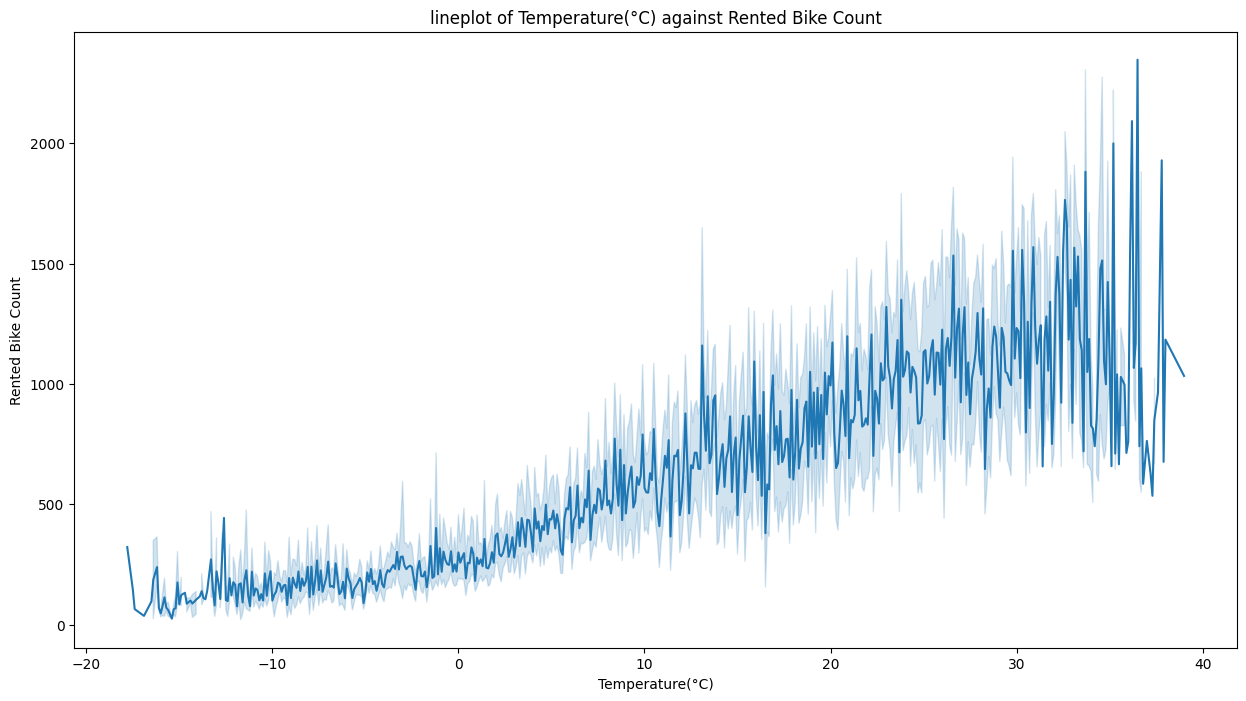

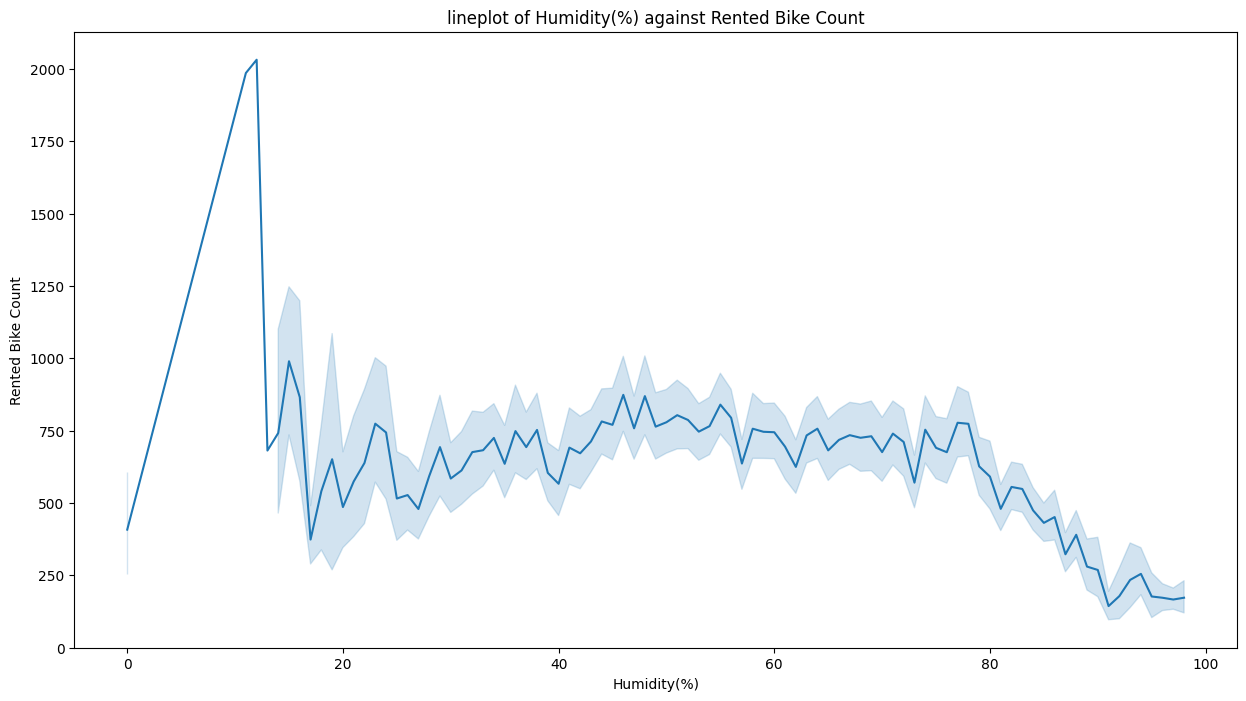

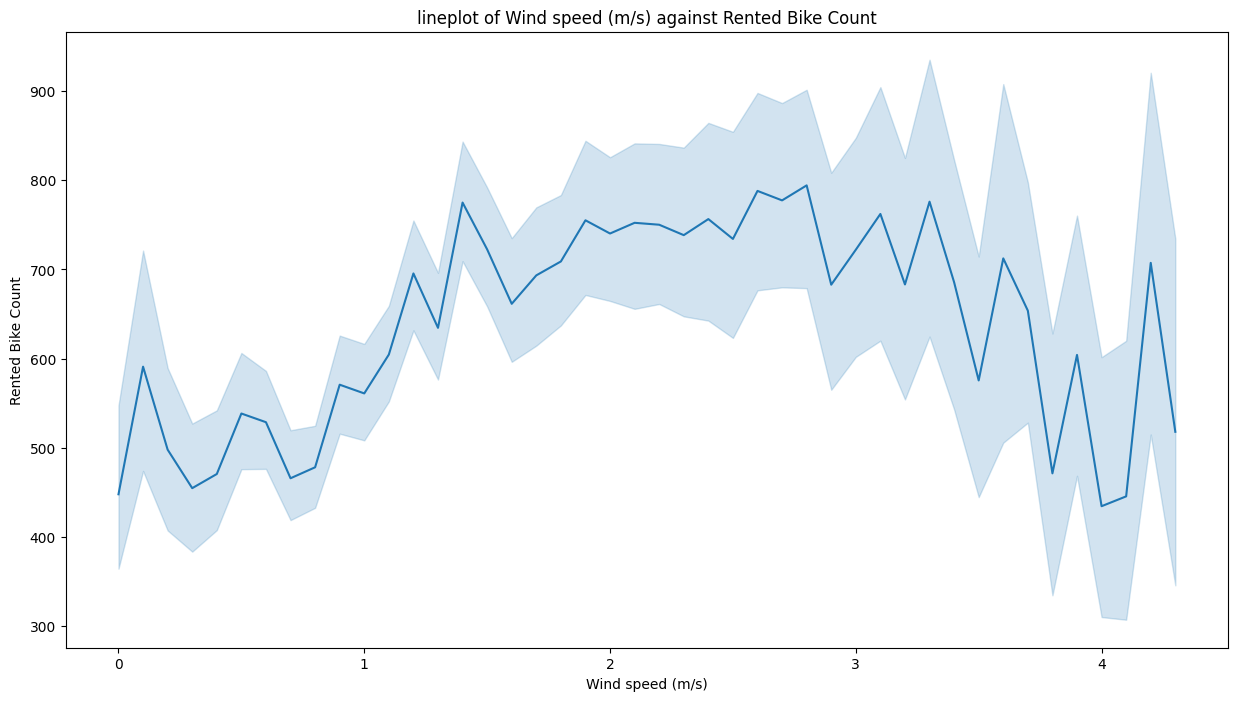

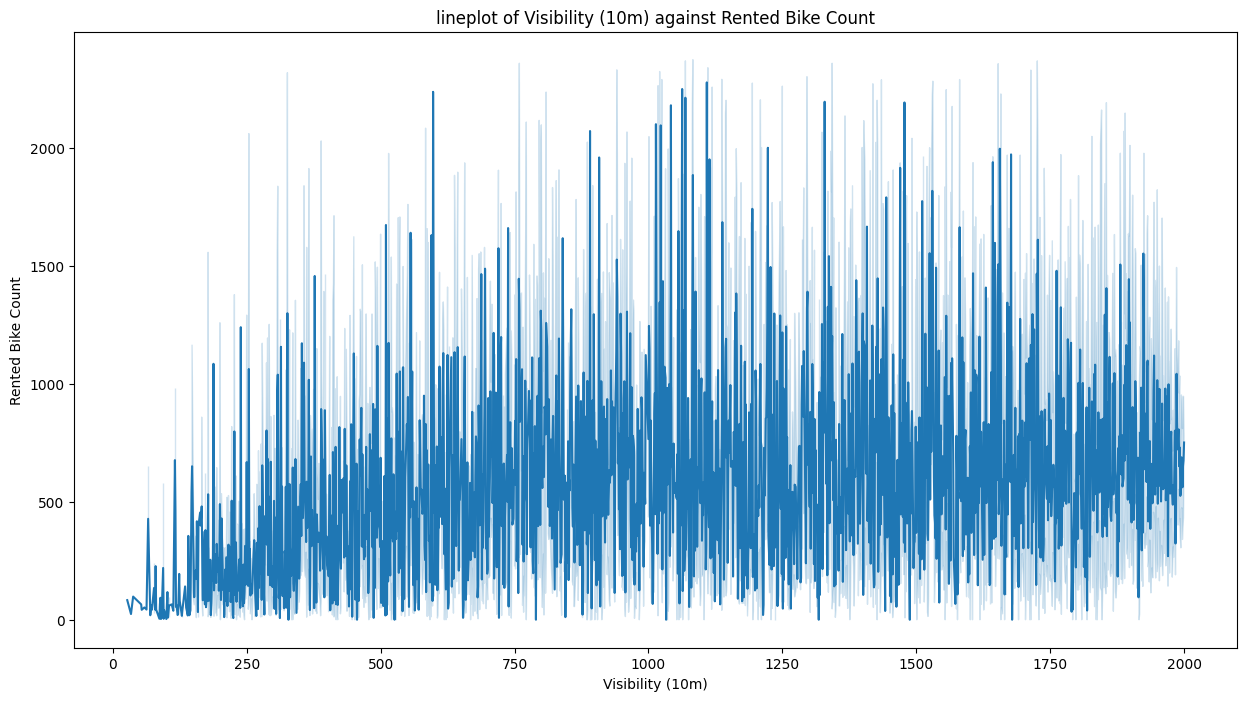

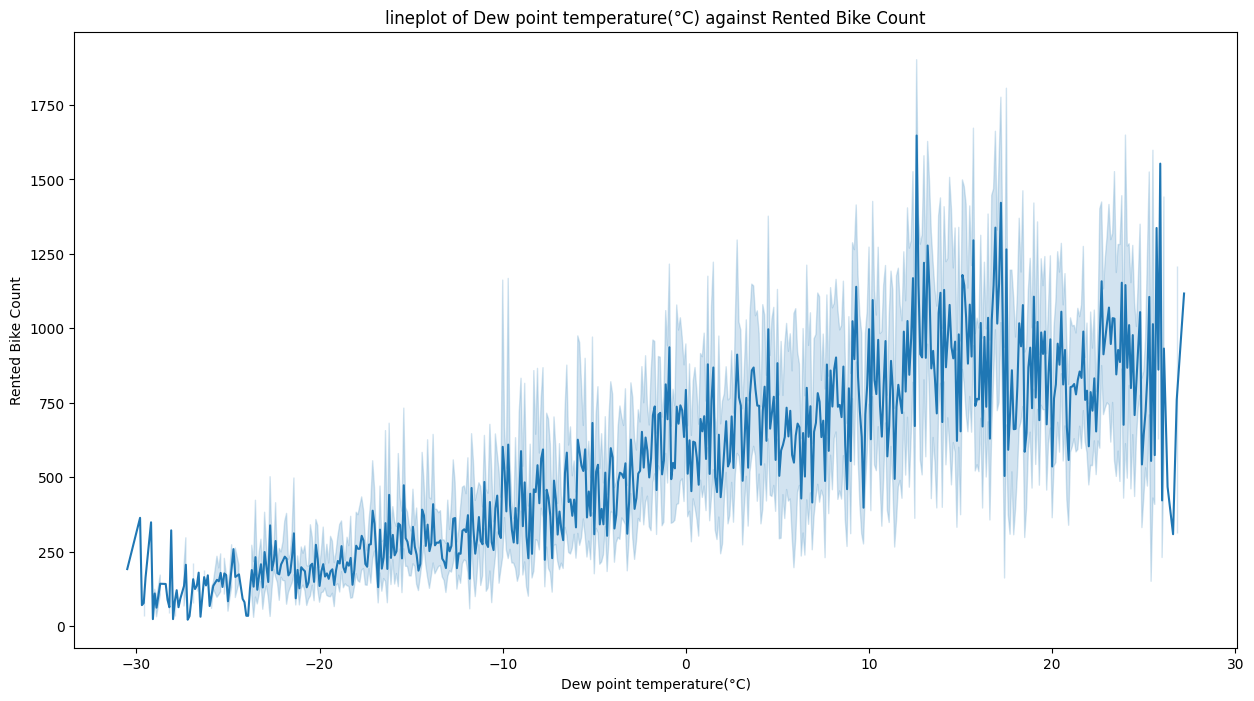

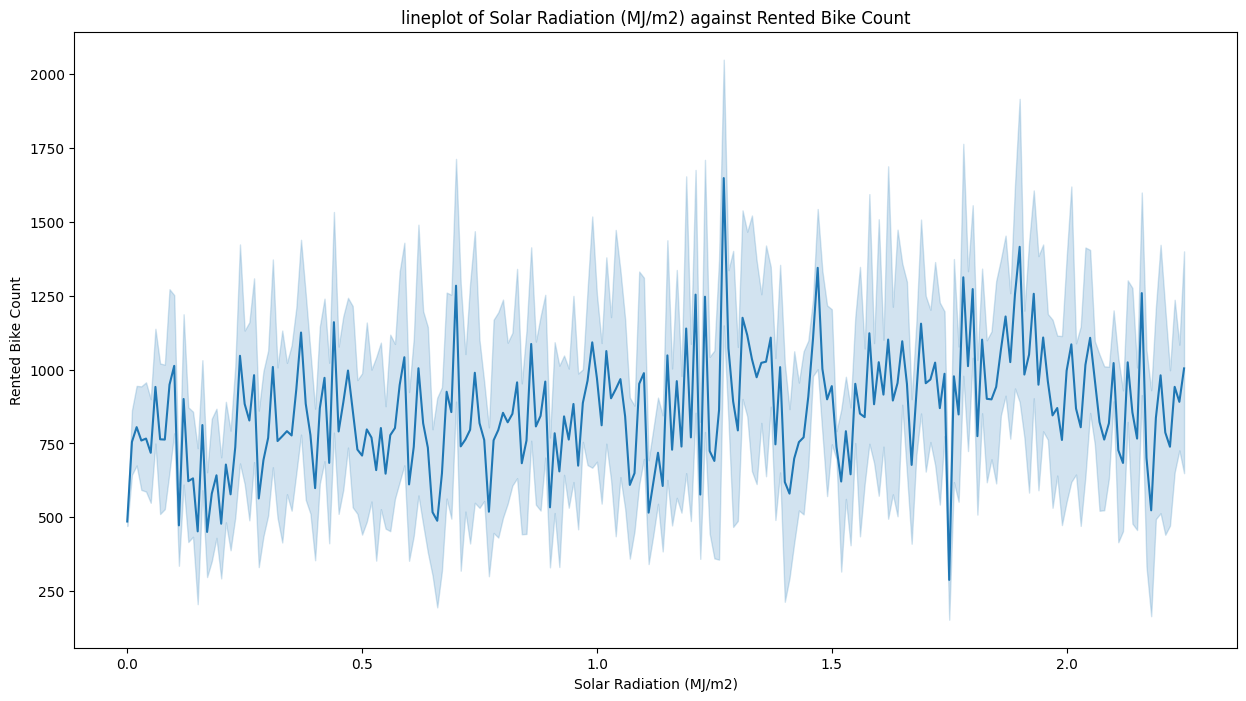

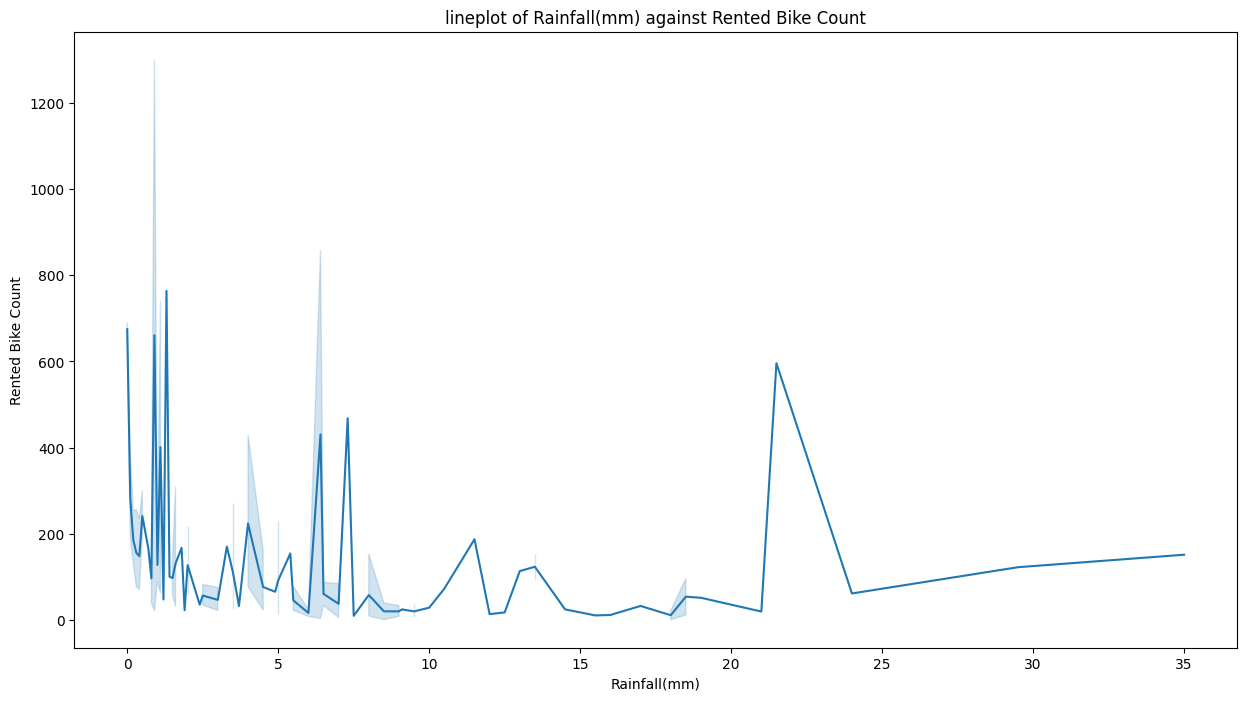

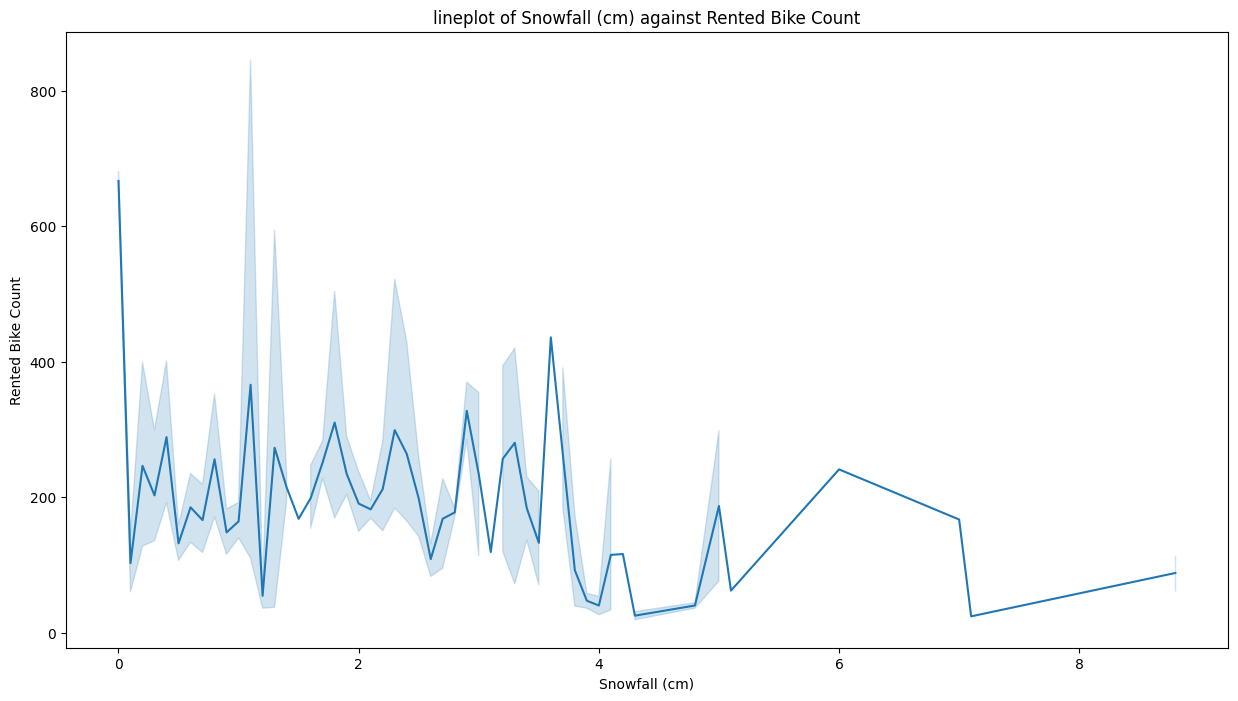

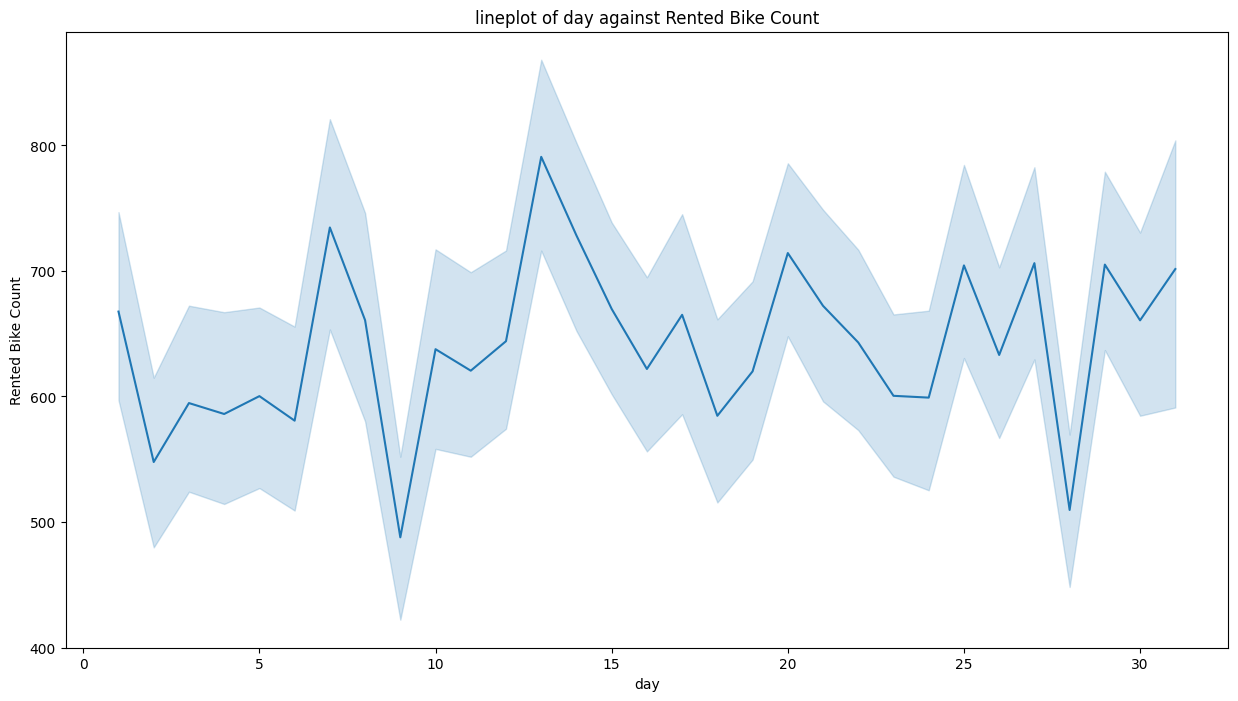

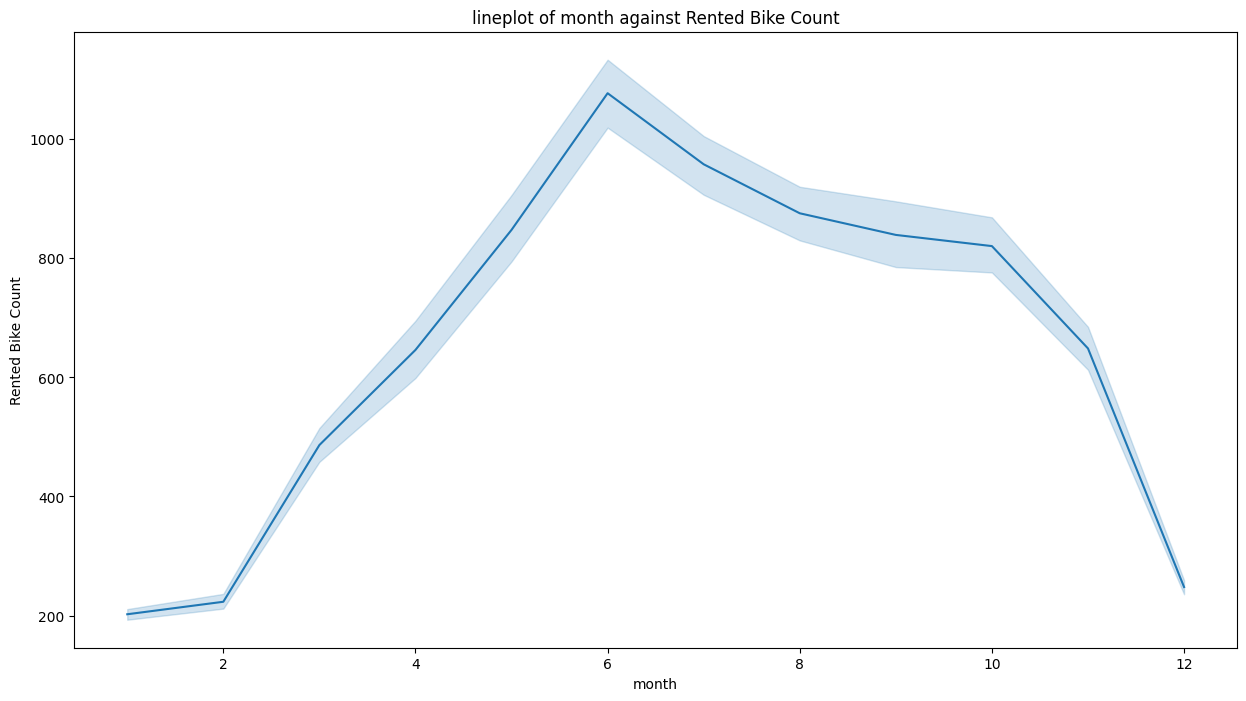

In [24]:
# Checking effect of each variable on use of rented bike
target_variables=[var for var in df.columns if var not in ['Rented Bike Count', 'Seasons', 'Holiday', 'Functioning Day', 'year']]
for var in target_variables:
    plt.figure(figsize=(15,8))
    ax=sns.lineplot(x=df[var], y=df["Rented Bike Count"],data=df)
    ax.set_title(f'lineplot of {var} against Rented Bike Count')
    plt.show()

# Obsevations :

Customers who travel most commonly use rented bikes in the morning at 8 a.m. and in the evening at 6 p.m.

When the humidity level is between 10% and 18%, people prefer to rent bikes.

When wind speed is between 2 m/s and 3.5 m/s, people consistently use rented bikes, and it is at its peak when wind speed is normal, which is 3.2 m/s.

Renting a bike is the best option for customers in dew point temperatures ranging from 12°C to 18°C. The use of a rented bike increases with increasing dew point temperatures, but it still reaches normal dew point temperatures.

According to the graph, solar radiation has no effect on customer use of rented bikes.

When it's not raining, people prefer rental bikes the most.

When there is no snowfall, most people opt to rent bikes. However, the majority of customers prefer to rent bikes when it snows up to 4 cm.

In the first 10 days of the month, most rented bikes are used by customers. Customers consistently use rented bikes in the last 15 days of the month.

In June, most rented bikes are used through the year, followed by October. Customers' use of rent bikes is at its peak from April to September.

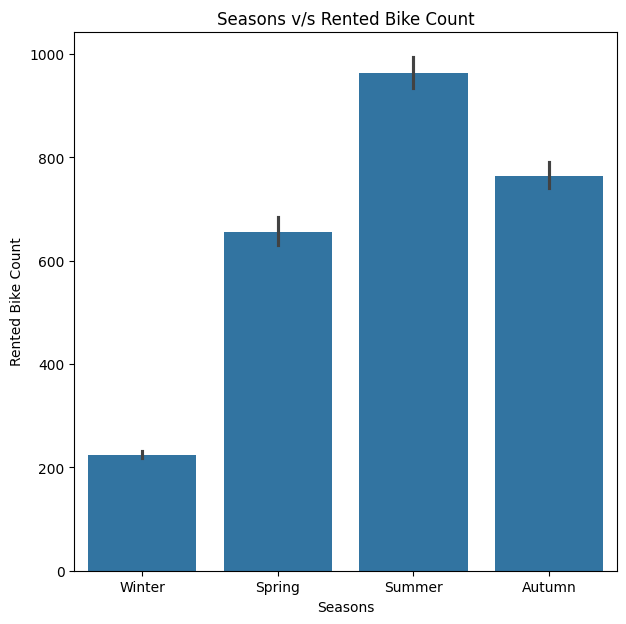

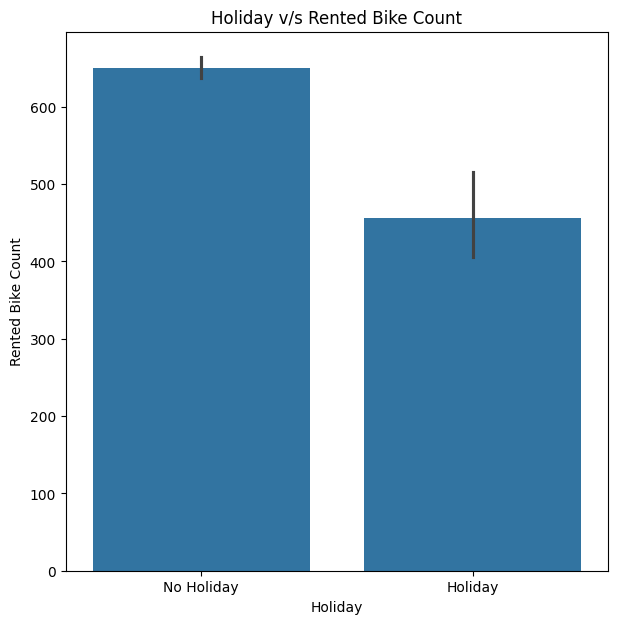

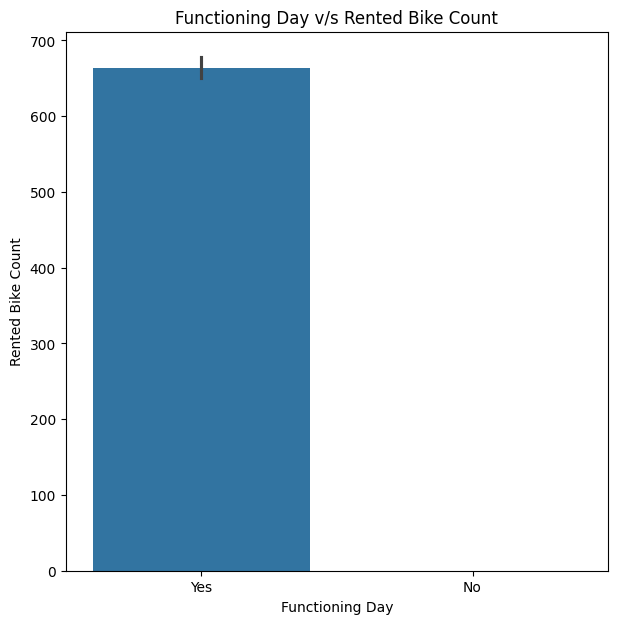

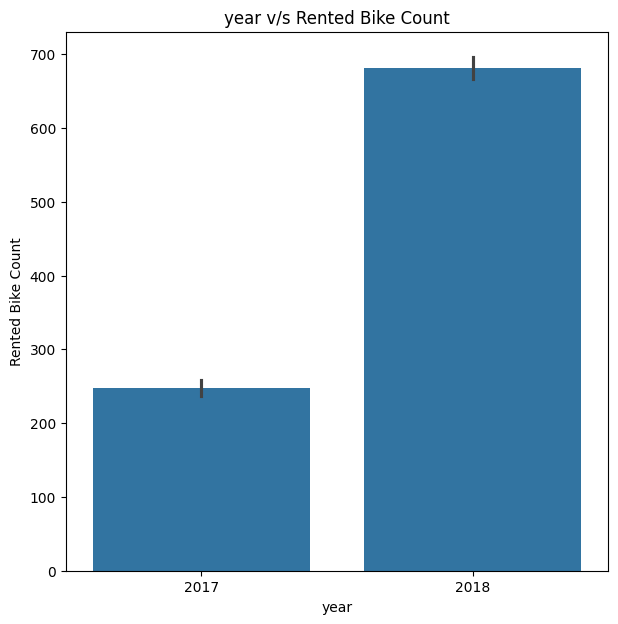

In [25]:
# Plotting bar plot for variables

# Defining target variables
target=[var for var in df.columns if var in ['Seasons', 'Holiday', 'Functioning Day', 'year']]

for var in target:
    plt.figure(figsize=(7,7))
    ax=sns.barplot(x=df[var], y='Rented Bike Count', data=df)
    ax.set_title(f'{var} v/s Rented Bike Count')
    plt.show()

# Data Preprocessing

#  Features encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
season=le.fit_transform(df["Seasons"])
holiday=le.fit_transform(df["Holiday"])
fd=le.fit_transform(df["Functioning Day"])

In [27]:
df.drop(['Seasons','Holiday','Functioning Day'],axis=1,inplace=True)

In [28]:
df['Seasons']=season
df['Holiday']=holiday
df['Functioning day']=fd
df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm)  day  month  year  Seasons  Holiday  \
0              0.0            0.0    1     12  2017        3        1   
1              0.0            0.0    1     12  2017        3        1   
2              0.0            0.0    1     12  2017        3        1   
3              0.0            0.0    1     12  2017        3        1   
4              0.0            0.0    1     12  2017        3        1   
...            ...            ...  ...    ...   ...      ...      ...   
8755           0.0            0.0   30     11  2018        0        1   
8756           0.0            0.0   30     11  2018        0        1   
8757           0.0            0.0   30     11  2018        0        1   
8758           0.0            0.0   30     11  2018        0        1   
8759           0.0            0.0   30     11  2018        0        1   

      Functioning day  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
...               ...  
8755                1  
8756                1  
8757                1  
8758                1  
8759                1  

[7760 rows x 16 columns]

# Checking multicollinearity in independant variables

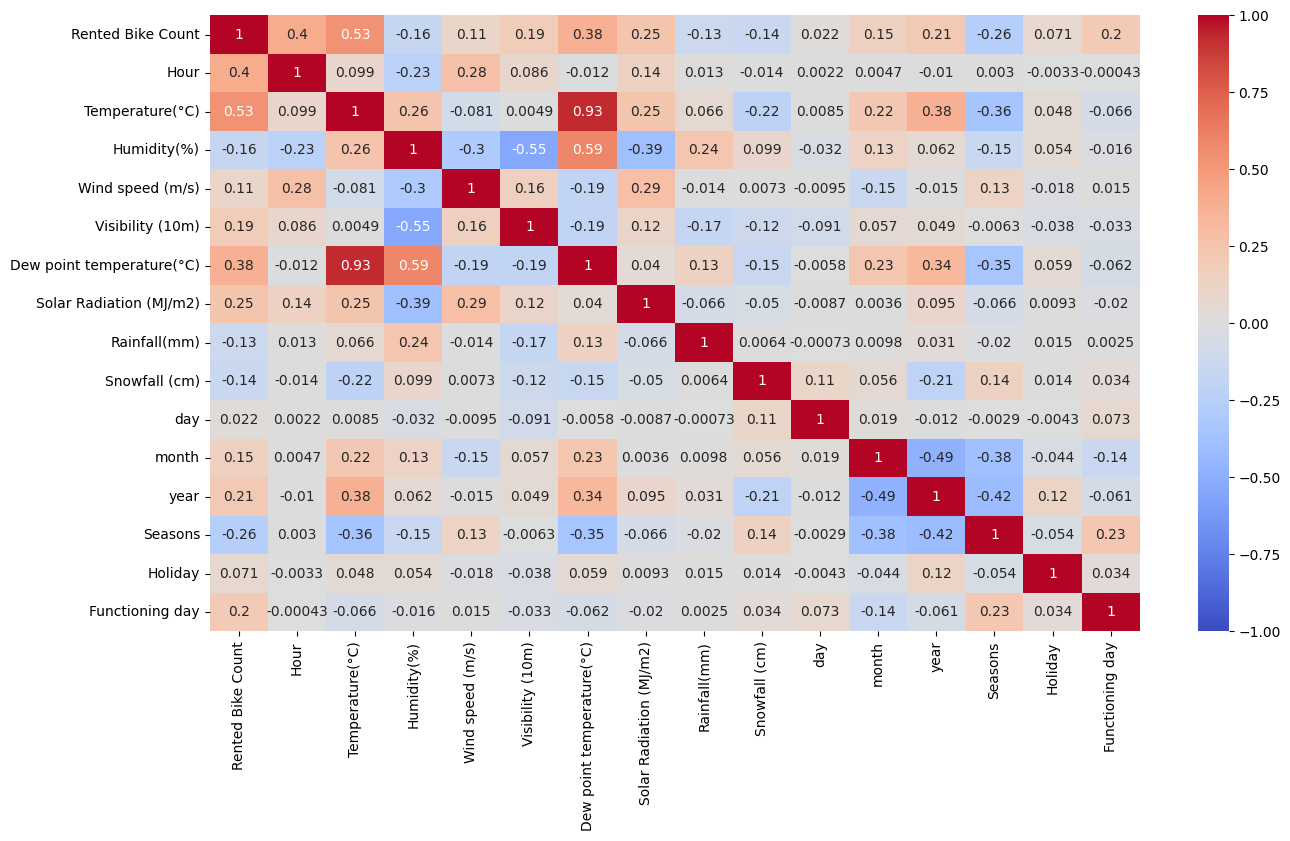

In [29]:
# Plotting a correlation heatmap for the dataset
plt.figure(figsize=(15,8))
correlation=df.corr()
sns.heatmap(correlation, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

Dew point temperature (°C) and temperature (°C) have a strong correlation. A moderate correlation exists between humidity (%) and dew point temperature (°C). The variables year and Dew point temperature (°C) have a weak correlation.

Our target variable is Rented bike Count and it is highly correleated with Hour and Temperature so it will be our independent variable

In [30]:
x=df[['Hour','Temperature(°C)']]
y=df['Rented Bike Count']

# Data Scaling

In [31]:
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

array([[-1.54912521, -1.4522291 ],
       [-1.41056335, -1.47788007],
       [-1.27200148, -1.52063167],
       [-1.13343962, -1.53773231],
       [-0.99487776, -1.52063167]])

# ML Model Implementation

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25,random_state=1)
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(x,y)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


LinearRegression()

In [33]:
print('The coeff is :',regr.coef_)
print('The interept is :',regr.intercept_)
print('The accuracy is :',regr.score(x_test,y_test))

The coeff is : [209.38581477 297.42737956]
The interept is : 640.7157216494845
The accuracy is : 0.4268471943539194


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


As it's accuracy is low so we will include all column except Rented Bike Count in independent variable and use Lasso and Ridge Regression

# Ridge Regression

In [34]:
# Creating the dataset with all dependent variables
dependent_variable = 'Rented Bike Count'

# Creating the dataset with all independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

# Create the data of independent variables
x = df[independent_variables].values
# Create the data of dependent variable
y = df[dependent_variable].values

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
#Creating train validation and test data
x_train,x_rem,y_train,y_rem=train_test_split(x,y, train_size=0.75,random_state=1)
x_valid,x_test,y_valid,y_test=train_test_split(x,y, test_size=0.40,random_state=1)

In [36]:
clf = GridSearchCV(Ridge(random_state=1), {
    'alpha':[1e-1,1e-10,1e-5,1e-15,1,2,5,10,15,20,30,35,40,45,50,60,65,70,85,100] 
}, cv=5, return_train_score=False)
clf.fit(x,y)
clf.cv_results_

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.19107e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.19107e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'mean_fit_time': array([0.00957823, 0.00552096, 0.00458279, 0.00776501, 0.00467801,
        0.00528336, 0.00516858, 0.00571175, 0.00368328, 0.00550213,
        0.00543313, 0.0050941 , 0.00389996, 0.00325809, 0.00327435,
        0.00616741, 0.00548272, 0.00411463, 0.00578704, 0.00377045]),
 'std_fit_time': array([0.0072435 , 0.00298092, 0.00083416, 0.00178866, 0.00245713,
        0.00222369, 0.00147696, 0.00258292, 0.00218462, 0.00262084,
        0.00326735, 0.00141147, 0.00057968, 0.00177991, 0.00194612,
        0.00214771, 0.0040537 , 0.00162718, 0.00173706, 0.00304648]),
 'mean_score_time': array([0.00133882, 0.00145693, 0.00077839, 0.00155706, 0.00076404,
        0.0011076 , 0.0015049 , 0.00128059, 0.00153079, 0.00020685,
        0.00103745, 0.00040207, 0.00175357, 0.00248809, 0.00078812,
        0.00084476, 0.00035014, 0.00077109, 0.0006505 , 0.00048761]),
 'std_score_time': array([0.0008238 , 0.00113858, 0.00095442, 0.00114983, 0.00078528,
        0.0017519 , 0.00155288, 0.001066

# Converting this result of GridSearch to Dataframe

In [37]:
a=pd.DataFrame(clf.cv_results_)
a

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.009578      0.007244         0.001339        0.000824         0.1   
1        0.005521      0.002981         0.001457        0.001139         0.0   
2        0.004583      0.000834         0.000778        0.000954     0.00001   
3        0.007765      0.001789         0.001557        0.001150         0.0   
4        0.004678      0.002457         0.000764        0.000785           1   
5        0.005283      0.002224         0.001108        0.001752           2   
6        0.005169      0.001477         0.001505        0.001553           5   
7        0.005712      0.002583         0.001281        0.001066          10   
8        0.003683      0.002185         0.001531        0.001340          15   
9        0.005502      0.002621         0.000207        0.000414          20   
10       0.005433      0.003267         0.001037        0.001560          30   
11       0.005094      0.001411         0.000402        0.000804          35   
12       0.003900      0.000580         0.001754        0.002243          40   
13       0.003258      0.001780         0.002488        0.001958          45   
14       0.003274      0.001946         0.000788        0.000664          50   
15       0.006167      0.002148         0.000845        0.000771          60   
16       0.005483      0.004054         0.000350        0.000487          65   
17       0.004115      0.001627         0.000771        0.000777          70   
18       0.005787      0.001737         0.000651        0.000459          85   
19       0.003770      0.003046         0.000488        0.000975         100   

              params  split0_test_score  split1_test_score  split2_test_score  \
0     {'alpha': 0.1}          -2.325273           0.297223           0.353107   
1   {'alpha': 1e-10}          -2.325322           0.297118           0.353109   
2   {'alpha': 1e-05}          -2.325322           0.297118           0.353109   
3   {'alpha': 1e-15}          -2.325322           0.297118           0.353109   
4       {'alpha': 1}          -2.324838           0.298162           0.353090   
5       {'alpha': 2}          -2.324362           0.299180           0.353070   
6       {'alpha': 5}          -2.322975           0.302093           0.353006   
7      {'alpha': 10}          -2.320800           0.306514           0.352890   
8      {'alpha': 15}          -2.318784           0.310463           0.352761   
9      {'alpha': 20}          -2.316914           0.314008           0.352623   
10     {'alpha': 30}          -2.313573           0.320090           0.352324   
11     {'alpha': 35}          -2.312083           0.322712           0.352166   
12     {'alpha': 40}          -2.310702           0.325098           0.352004   
13     {'alpha': 45}          -2.309422           0.327276           0.351838   
14     {'alpha': 50}          -2.308236           0.329269           0.351670   
15     {'alpha': 60}          -2.306125           0.332776           0.351328   
16     {'alpha': 65}          -2.305187           0.334322           0.351156   
17     {'alpha': 70}          -2.304321           0.335748           0.350983   
18     {'alpha': 85}          -2.302111           0.339414           0.350467   
19    {'alpha': 100}          -2.300404           0.342340           0.349958   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0            0.184596           0.465893        -0.204891        1.064063   
1            0.184540           0.465710        -0.204969        1.064046   
2            0.184540           0.465710        -0.204969        1.064046   
3            0.184540           0.465710        -0.204969        1.064046   
4            0.185091           0.467467        -0.204206        1.064211   
5            0.185629           0.469065        -0.203483        1.064357   
6            0.187169           0.473013        -0.201539        1.064685   
7    

In [38]:
clf.best_params_

{'alpha': 60}

In [39]:
clf.best_score_

-0.19156336012458014

In [40]:
ridge=Ridge(alpha=60).fit(x_train,y_train)
print("The accuracy of Ridge Regreesion is:",ridge.score(x_valid,y_valid))

The accuracy of Ridge Regreesion is: 0.54095149566463


# Lasso Regression

In [41]:
from sklearn.linear_model import Lasso
clf = GridSearchCV(Lasso(random_state=1), {
    'alpha':[1e-1,1e-10,2e-1,1e-5,2e-5,7e-1,1,2,5,7,10,15,20,30,35,45,50,60,70,85,100] 
}, cv=5, return_train_score=False)
clf.fit(x,y)
clf.cv_results_

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+08, tolerance: 2.425e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.548e+08, tolerance: 1.846e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.753e+07, toleranc

{'mean_fit_time': array([0.17656121, 0.20597239, 0.17361412, 0.19947243, 0.19577656,
        0.17158422, 0.16902575, 0.14675574, 0.12964602, 0.11990685,
        0.10494328, 0.10043907, 0.09991045, 0.09857345, 0.06731992,
        0.05933027, 0.06824899, 0.06640429, 0.04827905, 0.02251425,
        0.01824026]),
 'std_fit_time': array([0.02574733, 0.01181016, 0.03138448, 0.00204055, 0.01046987,
        0.03687423, 0.03773169, 0.0353939 , 0.05476252, 0.05053189,
        0.0454799 , 0.03808625, 0.03000448, 0.04494222, 0.02727693,
        0.03346264, 0.02489784, 0.03693369, 0.03804227, 0.01262435,
        0.00602343]),
 'mean_score_time': array([0.00294299, 0.00152164, 0.00224214, 0.00236783, 0.00296474,
        0.00282006, 0.00038424, 0.00123692, 0.00021076, 0.00177779,
        0.00368652, 0.00106735, 0.00218415, 0.00166392, 0.00150161,
        0.00033016, 0.00208683, 0.00021062, 0.00073586, 0.00096006,
        0.00130281]),
 'std_score_time': array([0.00355163, 0.00191609, 0.00213259, 0.00

Converting this result of GridSearch to Dataframe

In [42]:
a2=pd.DataFrame(clf.cv_results_)
a2

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.176561      0.025747         0.002943        0.003552         0.1   
1        0.205972      0.011810         0.001522        0.001916         0.0   
2        0.173614      0.031384         0.002242        0.002133         0.2   
3        0.199472      0.002041         0.002368        0.002497     0.00001   
4        0.195777      0.010470         0.002965        0.003367     0.00002   
5        0.171584      0.036874         0.002820        0.002812         0.7   
6        0.169026      0.037732         0.000384        0.000686           1   
7        0.146756      0.035394         0.001237        0.001080           2   
8        0.129646      0.054763         0.000211        0.000422           5   
9        0.119907      0.050532         0.001778        0.002521           7   
10       0.104943      0.045480         0.003687        0.002344          10   
11       0.100439      0.038086         0.001067        0.000886          15   
12       0.099910      0.030004         0.002184        0.002676          20   
13       0.098573      0.044942         0.001664        0.001721          30   
14       0.067320      0.027277         0.001502        0.001065          35   
15       0.059330      0.033463         0.000330        0.000440          45   
16       0.068249      0.024898         0.002087        0.003069          50   
17       0.066404      0.036934         0.000211        0.000421          60   
18       0.048279      0.038042         0.000736        0.000911          70   
19       0.022514      0.012624         0.000960        0.000954          85   
20       0.018240      0.006023         0.001303        0.002140         100   

              params  split0_test_score  split1_test_score  split2_test_score  \
0     {'alpha': 0.1}          -2.324521           0.300288           0.353470   
1   {'alpha': 1e-10}          -2.325322           0.297121           0.353152   
2     {'alpha': 0.2}          -2.323823           0.303386           0.353785   
3   {'alpha': 1e-05}          -2.325322           0.297122           0.353152   
4   {'alpha': 2e-05}          -2.325322           0.297122           0.353152   
5     {'alpha': 0.7}          -2.321898           0.317828           0.355313   
6       {'alpha': 1}          -2.321993           0.325658           0.356192   
7       {'alpha': 2}          -2.317413           0.339147           0.358662   
8       {'alpha': 5}          -2.321402           0.345053           0.358631   
9       {'alpha': 7}          -2.327451           0.350427           0.358397   
10     {'alpha': 10}          -2.334144           0.357198           0.357694   
11     {'alpha': 15}          -2.401918           0.363065           0.353185   
12     {'alpha': 20}          -2.521125           0.363093           0.346804   
13     {'alpha': 30}          -2.913076           0.351811           0.331373   
14     {'alpha': 35}          -3.035737           0.345493           0.326468   
15     {'alpha': 45}          -2.991831           0.342669           0.320261   
16     {'alpha': 50}          -2.972119           0.340889           0.320960   
17     {'alpha': 60}          -2.937176           0.336667           0.322123   
18     {'alpha': 70}          -2.908793           0.331525           0.322805   
19     {'alpha': 85}          -2.880884           0.329733           0.323260   
20    {'alpha': 100}          -2.856917           0.331071           0.322111   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0            0.185779           0.472904        -0.202416        1.065064   
1            0.184540           0.465705        -0.204961        1.064050   
2            0.187015           0.479724        -0.199983        1.066068   
3            0.184540           0.465706        -0.204960        1.064050   
4            0.184541           0.465706        -0.204960        1.064050  

In [43]:
clf.best_params_

{'alpha': 2}

In [44]:
clf.best_score_

-0.17753033980196023

In [45]:
lasso=Lasso(alpha=2).fit(x_train,y_train)
print("The accuracy of Lasso Regreesion is:",lasso.score(x_valid,y_valid))

The accuracy of Lasso Regreesion is: 0.5454157572100438


# We have see that the accuracy of Linear Regression is increased in Lasso and Ridge Regression

# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeRegressor
clf = GridSearchCV(DecisionTreeRegressor(random_state=1), {
    'splitter':['best','random'],
    'max_depth':[2,4,7,8,10,12,13,15,17,20],
    'min_samples_leaf':[2,4,5,7,8,10,12,14]
}, cv=5, return_train_score=False)
clf.fit(x,y)
clf.cv_results_

{'mean_fit_time': array([0.01256294, 0.00520563, 0.0100522 , 0.00493302, 0.01075311,
        0.00498877, 0.01309733, 0.0057591 , 0.00929675, 0.00388675,
        0.01011295, 0.00497408, 0.01037683, 0.00434475, 0.01059861,
        0.00673294, 0.02049022, 0.00743532, 0.02032738, 0.00682311,
        0.03201928, 0.00832672, 0.01968756, 0.00427046, 0.01911092,
        0.00671821, 0.01839352, 0.00712638, 0.01866078, 0.00718756,
        0.02336726, 0.00755253, 0.03668714, 0.00859504, 0.02938409,
        0.00934587, 0.03095474, 0.01027017, 0.03290563, 0.00927   ,
        0.0426733 , 0.00872936, 0.03321228, 0.01105456, 0.03413019,
        0.01038752, 0.03245029, 0.0088841 , 0.04104919, 0.01193862,
        0.0423893 , 0.01141696, 0.03861403, 0.01095176, 0.03938289,
        0.00957913, 0.04437222, 0.01787038, 0.04207096, 0.01201034,
        0.04556179, 0.04542394, 0.06571703, 0.01253357, 0.06066899,
        0.01554394, 0.05989919, 0.01666131, 0.05227447, 0.01783433,
        0.05775886, 0.01465969,

In [47]:
a3=pd.DataFrame(clf.cv_results_)
a3

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.012563      0.001380         0.001058        0.001175   
1         0.005206      0.002801         0.000000        0.000000   
2         0.010052      0.001559         0.000711        0.000607   
3         0.004933      0.004121         0.001564        0.003127   
4         0.010753      0.001831         0.002408        0.002290   
..             ...           ...              ...             ...   
155       0.015030      0.002858         0.000367        0.000735   
156       0.051023      0.002826         0.001205        0.001942   
157       0.012932      0.001321         0.002314        0.001438   
158       0.048758      0.000423         0.001195        0.000635   
159       0.013345      0.000842         0.001927        0.001280   

    param_max_depth param_min_samples_leaf param_splitter  \
0                 2                      2           best   
1                 2                      2         random   
2                 2                      4           best   
3                 2                      4         random   
4                 2                      5           best   
..              ...                    ...            ...   
155              20                     10         random   
156              20                     12           best   
157              20                     12         random   
158              20                     14           best   
159              20                     14         random   

                                                params  split0_test_score  \
0    {'max_depth': 2, 'min_samples_leaf': 2, 'split...          -6.402472   
1    {'max_depth': 2, 'min_samples_leaf': 2, 'split...         -17.740461   
2    {'max_depth': 2, 'min_samples_leaf': 4, 'split...          -6.402472   
3    {'max_depth': 2, 'min_samples_leaf': 4, 'split...         -17.740461   
4    {'max_depth': 2, 'min_samples_leaf': 5, 'split...          -6.402472   
..                                                 ...                ...   
155  {'max_depth': 20, 'min_samples_leaf': 10, 'spl...          -3.408652   
156  {'max_depth': 20, 'min_samples_leaf': 12, 'spl...          -1.103430   
157  {'max_depth': 20, 'min_samples_leaf': 12, 'spl...          -3.627690   
158  {'max_depth': 20, 'min_samples_leaf': 14, 'spl...          -1.512143   
159  {'max_depth': 20, 'min_samples_leaf': 14, 'spl...          -4.872671   

     split1_test_score  split2_test_score  split3_test_score  \
0            -0.136304           0.240138           0.345989   
1            -0.499798           0.072157           0.229129   
2            -0.136304           0.240138           0.345989   
3            -0.499798           0.072157           0.229129   
4            -0.136304           0.240138           0.345989   
..                 ...                ...                ...   
155           0.231022           0.669773           0.558114   
156           0.363445           0.653768           0.576781   
157           0.095953           0.536034           0.338094   
158           0.368736           0.664844           0.596344   
159           0.423921           0.599982           0.620138   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
0            -0.075695        -1.205669        2.604809              145  
1            -0.070285        -3.601852        7.073468              153  
2            -0.075695        -1.205669        2.604809              145  
3            -0.070285        -3.601852        7.073468              153  
4            -0.075695        -1.205669        2.604809              145  
..                 ...              ...             ...              ...  
155           0.414613        -0.307026        1.557752               87  
156           0.551430         0.208399        0.662822               30  
157           0.250162        -0.481489        1.579519              116  

In [48]:
clf.best_params_

{'max_depth': 10, 'min_samples_leaf': 12, 'splitter': 'best'}

In [49]:
clf.best_score_

0.4432926441026918

In [50]:
dtree=DecisionTreeRegressor(random_state=1,max_depth=10,min_samples_leaf=12,splitter='best').fit(x_train,y_train)
print("The accuracy of Decision Tree Regreesion is:",dtree.score(x_valid,y_valid))

The accuracy of Decision Tree Regreesion is: 0.8640852233265484


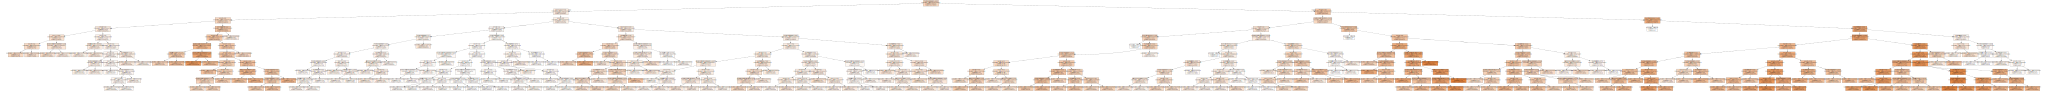

In [51]:
# Visulaizing Decision Tree

# Importing libraries
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# Visualizing graph
graph = Source(tree.export_graphviz(dtree, out_file=None
   , feature_names=df[independent_variables].columns
   , filled = True))
display(SVG(graph.pipe(format='svg')))

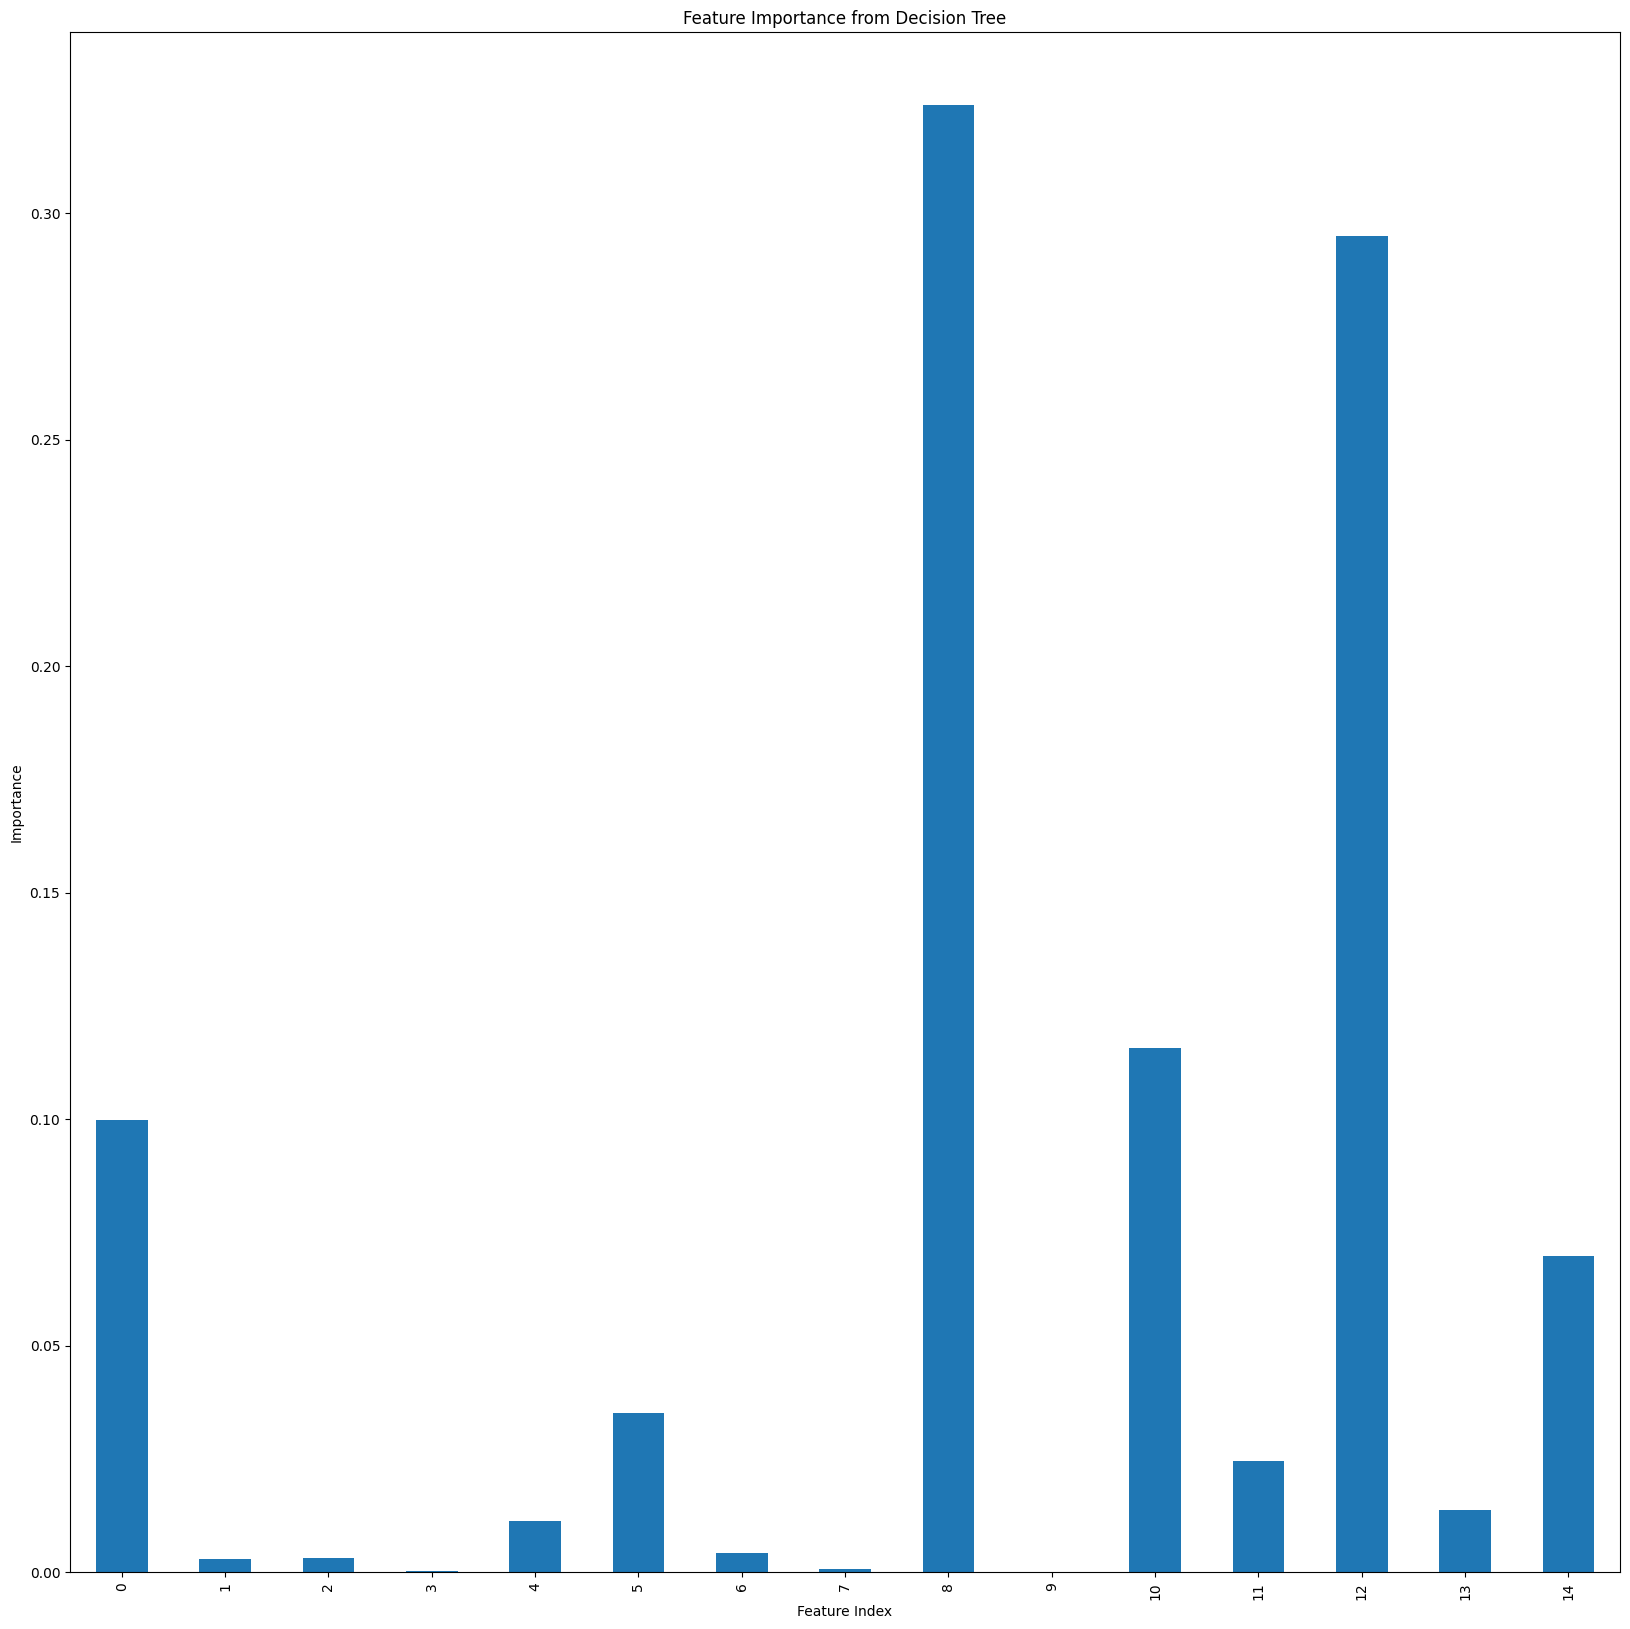

In [107]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

#Get feature importances
feat_importance = pd.Series(dtree.feature_importances_, index=np.arange(x_train.shape[1]))

# Plot the feature importances
feat_importance.plot(kind='bar')
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importance from Decision Tree")
plt.show()

# Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor
clf = GridSearchCV(RandomForestRegressor(random_state=1), {
    'n_estimators':[20,50,100,125,150,200],
    'max_depth':[2,4,7,10,12,15,20],
    'min_samples_leaf':[2,5,7,10,12]
}, cv=5, return_train_score=False)
clf.fit(x,y)
clf.cv_results_

{'mean_fit_time': array([0.09930253, 0.23704672, 0.4701138 , 0.59340119, 0.77062449,
        0.98742061, 0.09482651, 0.24704528, 0.47383828, 0.58428493,
        0.75795312, 0.97681499, 0.09561324, 0.2492125 , 0.50648713,
        0.59106569, 0.77567987, 0.97104092, 0.09465261, 0.23330684,
        0.46515813, 0.59261742, 0.78713465, 0.97416835, 0.09466462,
        0.23462219, 0.47681446, 0.58651042, 0.76002707, 1.0078423 ,
        0.16739244, 0.4201057 , 0.87251892, 1.13358107, 1.26292634,
        1.75565844, 0.16846495, 0.41742311, 0.86755557, 1.05908623,
        1.34111423, 1.68705993, 0.16997576, 0.50580821, 0.83376718,
        1.04341555, 1.35902829, 1.68186975, 0.16695743, 0.41578946,
        0.91915379, 1.04133005, 1.25137453, 1.75585928, 0.16727471,
        0.42391353, 0.85070877, 1.14275613, 1.25583324, 1.76647439,
        0.287116  , 0.71702271, 1.44607077, 1.89928122, 2.23328667,
        2.97392302, 0.28465457, 0.70712266, 1.45221887, 1.84701395,
        2.23370543, 2.92419715,

In [55]:
a4=pd.DataFrame(clf.cv_results_)
a4

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.099303      0.008298         0.002052        0.000299   
1         0.237047      0.004061         0.005139        0.000958   
2         0.470114      0.005162         0.008147        0.000467   
3         0.593401      0.014849         0.010283        0.000663   
4         0.770624      0.080871         0.012781        0.000948   
..             ...           ...              ...             ...   
205       2.039996      0.187185         0.017568        0.003609   
206       3.914684      0.164196         0.030915        0.001994   
207       4.838242      0.234666         0.037295        0.003985   
208       5.642819      0.279570         0.044624        0.004852   
209       7.660349      0.154876         0.058795        0.004820   

    param_max_depth param_min_samples_leaf param_n_estimators  \
0                 2                      2                 20   
1                 2                      2                 50   
2                 2                      2                100   
3                 2                      2                125   
4                 2                      2                150   
..              ...                    ...                ...   
205              20                     12                 50   
206              20                     12                100   
207              20                     12                125   
208              20                     12                150   
209              20                     12                200   

                                                params  split0_test_score  \
0    {'max_depth': 2, 'min_samples_leaf': 2, 'n_est...          -6.030349   
1    {'max_depth': 2, 'min_samples_leaf': 2, 'n_est...          -6.000385   
2    {'max_depth': 2, 'min_samples_leaf': 2, 'n_est...          -5.970533   
3    {'max_depth': 2, 'min_samples_leaf': 2, 'n_est...          -5.961446   
4    {'max_depth': 2, 'min_samples_leaf': 2, 'n_est...          -6.004102   
..                                                 ...                ...   
205  {'max_depth': 20, 'min_samples_leaf': 12, 'n_e...          -1.544284   
206  {'max_depth': 20, 'min_samples_leaf': 12, 'n_e...          -1.257244   
207  {'max_depth': 20, 'min_samples_leaf': 12, 'n_e...          -1.344879   
208  {'max_depth': 20, 'min_samples_leaf': 12, 'n_e...          -1.277797   
209  {'max_depth': 20, 'min_samples_leaf': 12, 'n_e...          -1.276271   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.458061           0.255482           0.370712   
1             0.424781           0.249465           0.373771   
2             0.431860           0.250630           0.375529   
3             0.426543           0.250670           0.375011   
4             0.428736           0.250742           0.374748   
..                 ...                ...                ...   
205           0.626162           0.704136           0.679549   
206           0.630707           0.708731           0.678975   
207           0.632284           0.707443           0.680552   
208           0.627204           0.707492           0.681835   
209           0.629576           0.709337           0.682486   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
0            -0.012379        -0.991694        2.524301              196  
1            -0.013051        -0.993084        2.508230              201  
2            -0.011051        -0.984713        2.497576              186  
3            -0.008644        -0.983573        2.493481              181  
4            -0.007485        -0.991472        2.510830              191  
..                 ...              ...             ...              ...  
205           0.571060         0.207325        0.877004              113  
206           0.557674         0.263769        0.762219               73  
207           0.557779    

In [56]:
clf.best_params_

{'max_depth': 15, 'min_samples_leaf': 5, 'n_estimators': 20}

In [57]:
clf.best_score_

0.4555181140442982

In [59]:
rf=RandomForestRegressor(random_state=1,max_depth=15,min_samples_leaf=5,n_estimators=20).fit(x_train,y_train)
print("The accuracy of Random Forest Regreesion is:",rf.score(x_valid,y_valid))

The accuracy of Random Forest Regreesion is: 0.9305578896323963


# Gradient Boost

We will use RandomSearch here because Grid Search will take more time as parameter is complex and dataset is not small

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
rf= RandomizedSearchCV(GradientBoostingRegressor(random_state=1), {
    'n_estimators':[5,20,50,100,125,150],
    'max_depth':[2,5,7,10,12,15,20],
    'min_samples_leaf':[2,5,7,10,12,15],
    'learning_rate':[0.001,0.005,0.01,0.02,0.03,0.05,0.1,0.2,0.5,1,2]
}, cv=5, return_train_score=False)
rf.fit(x,y)
rf.cv_results_

{'mean_fit_time': array([ 2.01463985,  4.80816011,  4.27998948, 11.44708691,  0.30030222,
         2.88317399,  1.46288466,  0.62559652,  1.09221926,  7.45009184]),
 'std_fit_time': array([0.15262191, 0.30591417, 0.20935583, 0.221963  , 0.04337412,
        0.16018293, 0.1272467 , 0.05266091, 0.05963278, 0.25487939]),
 'mean_score_time': array([0.00424805, 0.00964584, 0.00702205, 0.025033  , 0.00242782,
        0.00905914, 0.00145655, 0.00318031, 0.00343981, 0.01454797]),
 'std_score_time': array([0.00132864, 0.00057507, 0.00254221, 0.00290616, 0.00043149,
        0.00225469, 0.00126928, 0.00252998, 0.00179549, 0.00371052]),
 'param_n_estimators': masked_array(data=[50, 125, 150, 150, 5, 50, 20, 50, 100, 125],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[7, 10, 7, 5, 5, 15, 7, 15, 7, 10],
              mask=[False, False, Fal

In [56]:
a5=pd.DataFrame(rf.cv_results_)
a5

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.014640      0.152622         0.004248        0.001329   
1       4.808160      0.305914         0.009646        0.000575   
2       4.279989      0.209356         0.007022        0.002542   
3      11.447087      0.221963         0.025033        0.002906   
4       0.300302      0.043374         0.002428        0.000431   
5       2.883174      0.160183         0.009059        0.002255   
6       1.462885      0.127247         0.001457        0.001269   
7       0.625597      0.052661         0.003180        0.002530   
8       1.092219      0.059633         0.003440        0.001795   
9       7.450092      0.254879         0.014548        0.003711   

  param_n_estimators param_min_samples_leaf param_max_depth  \
0                 50                      7               7   
1                125                     10               7   
2                150                      7               5   
3                150                      5              15   
4                  5                      5              12   
5                 50                     15              15   
6                 20                      7              15   
7                 50                     15               2   
8                100                      7               2   
9                125                     10              12   

  param_learning_rate                                             params  \
0                0.01  {'n_estimators': 50, 'min_samples_leaf': 7, 'm...   
1               0.005  {'n_estimators': 125, 'min_samples_leaf': 10, ...   
2               0.001  {'n_estimators': 150, 'min_samples_leaf': 7, '...   
3                 0.2  {'n_estimators': 150, 'min_samples_leaf': 5, '...   
4                   2  {'n_estimators': 5, 'min_samples_leaf': 5, 'ma...   
5                0.03  {'n_estimators': 50, 'min_samples_leaf': 15, '...   
6                   2  {'n_estimators': 20, 'min_samples_leaf': 7, 'm...   
7                 0.2  {'n_estimators': 50, 'min_samples_leaf': 15, '...   
8                   2  {'n_estimators': 100, 'min_samples_leaf': 7, '...   
9                 0.2  {'n_estimators': 125, 'min_samples_leaf': 10, ...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0          -6.375940           0.256317           0.286234           0.442303   
1          -5.486946           0.340505           0.361909           0.530023   
2         -10.925757          -0.172416          -0.034629          -0.039527   
3          -0.303812           0.552051           0.702694           0.625156   
4         -20.517752          -2.816072          -0.530660          -2.883441   
5          -1.762769           0.595271           0.637813           0.732433   
6         -64.773356          -5.068592          -1.497514          -2.952684   
7          -2.444989           0.572495           0.653801           0.572987   
8         -12.984675          -0.482679          -0.224636          -0.325525   
9          -0.359158           0.593407           0.728237           0.670300   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.382969        -1.001623        2.687984                6  
1           0.428582        -0.765185        2.361803                5  
2           0.109041        -2.212658        4.357460                7  
3           0.699317         0.455081        0.383461                2  
4          -1.272260        -5.604037        7.511281                9  
5           0.612069         0.162963        0.964034                3  
6          -3.210959       -15.500621       24.662535               10  
7           0.586523        -0.011837        1.216947                4  
8          -0.033377        -2.810178        5.089338                8  
9           0.666886         0.459934        0.411776                1

In [83]:
rf.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 12,
 'max_depth': 15,
 'learning_rate': 0.2}

In [84]:
rf.best_score_

0.47959209600901176

In [57]:
gb=GradientBoostingRegressor(random_state=1,max_depth=15,min_samples_leaf=12,n_estimators=100,learning_rate=0.2).fit(x_train,y_train)
print("The accuracy of Gradient Boost Regreesion is:",gb.score(x_valid,y_valid))

The accuracy of Gradient Boost Regreesion is: 0.9971820307584474


|--- 12 <= 9.55
|   |--- 5 <= 0.50
|   |   |--- 8 <= 6.50
|   |   |   |--- 8 <= 1.50
|   |   |   |   |--- 2 <= 18.50
|   |   |   |   |   |--- 8 <= 0.50
|   |   |   |   |   |   |--- value: [-30.00]
|   |   |   |   |   |--- 8 >  0.50
|   |   |   |   |   |   |--- value: [-151.20]
|   |   |   |   |--- 2 >  18.50
|   |   |   |   |   |--- 4 <= -1.25
|   |   |   |   |   |   |--- value: [-163.50]
|   |   |   |   |   |--- 4 >  -1.25
|   |   |   |   |   |   |--- value: [-312.57]
|   |   |   |--- 8 >  1.50
|   |   |   |   |--- 8 <= 2.50
|   |   |   |   |   |--- 7 <= 1590.50
|   |   |   |   |   |   |--- value: [-351.89]
|   |   |   |   |   |--- 7 >  1590.50
|   |   |   |   |   |   |--- value: [-279.74]
|   |   |   |   |--- 8 >  2.50
|   |   |   |   |   |--- 8 <= 5.50
|   |   |   |   |   |   |--- 8 <= 3.50
|   |   |   |   |   |   |   |--- 12 <= 6.15
|   |   |   |   |   |   |   |   |--- value: [-444.02]
|   |   |   |   |   |   |   |--- 12 >  6.15
|   |   |   |   |   |   |   |   |--- value: [-367.02]

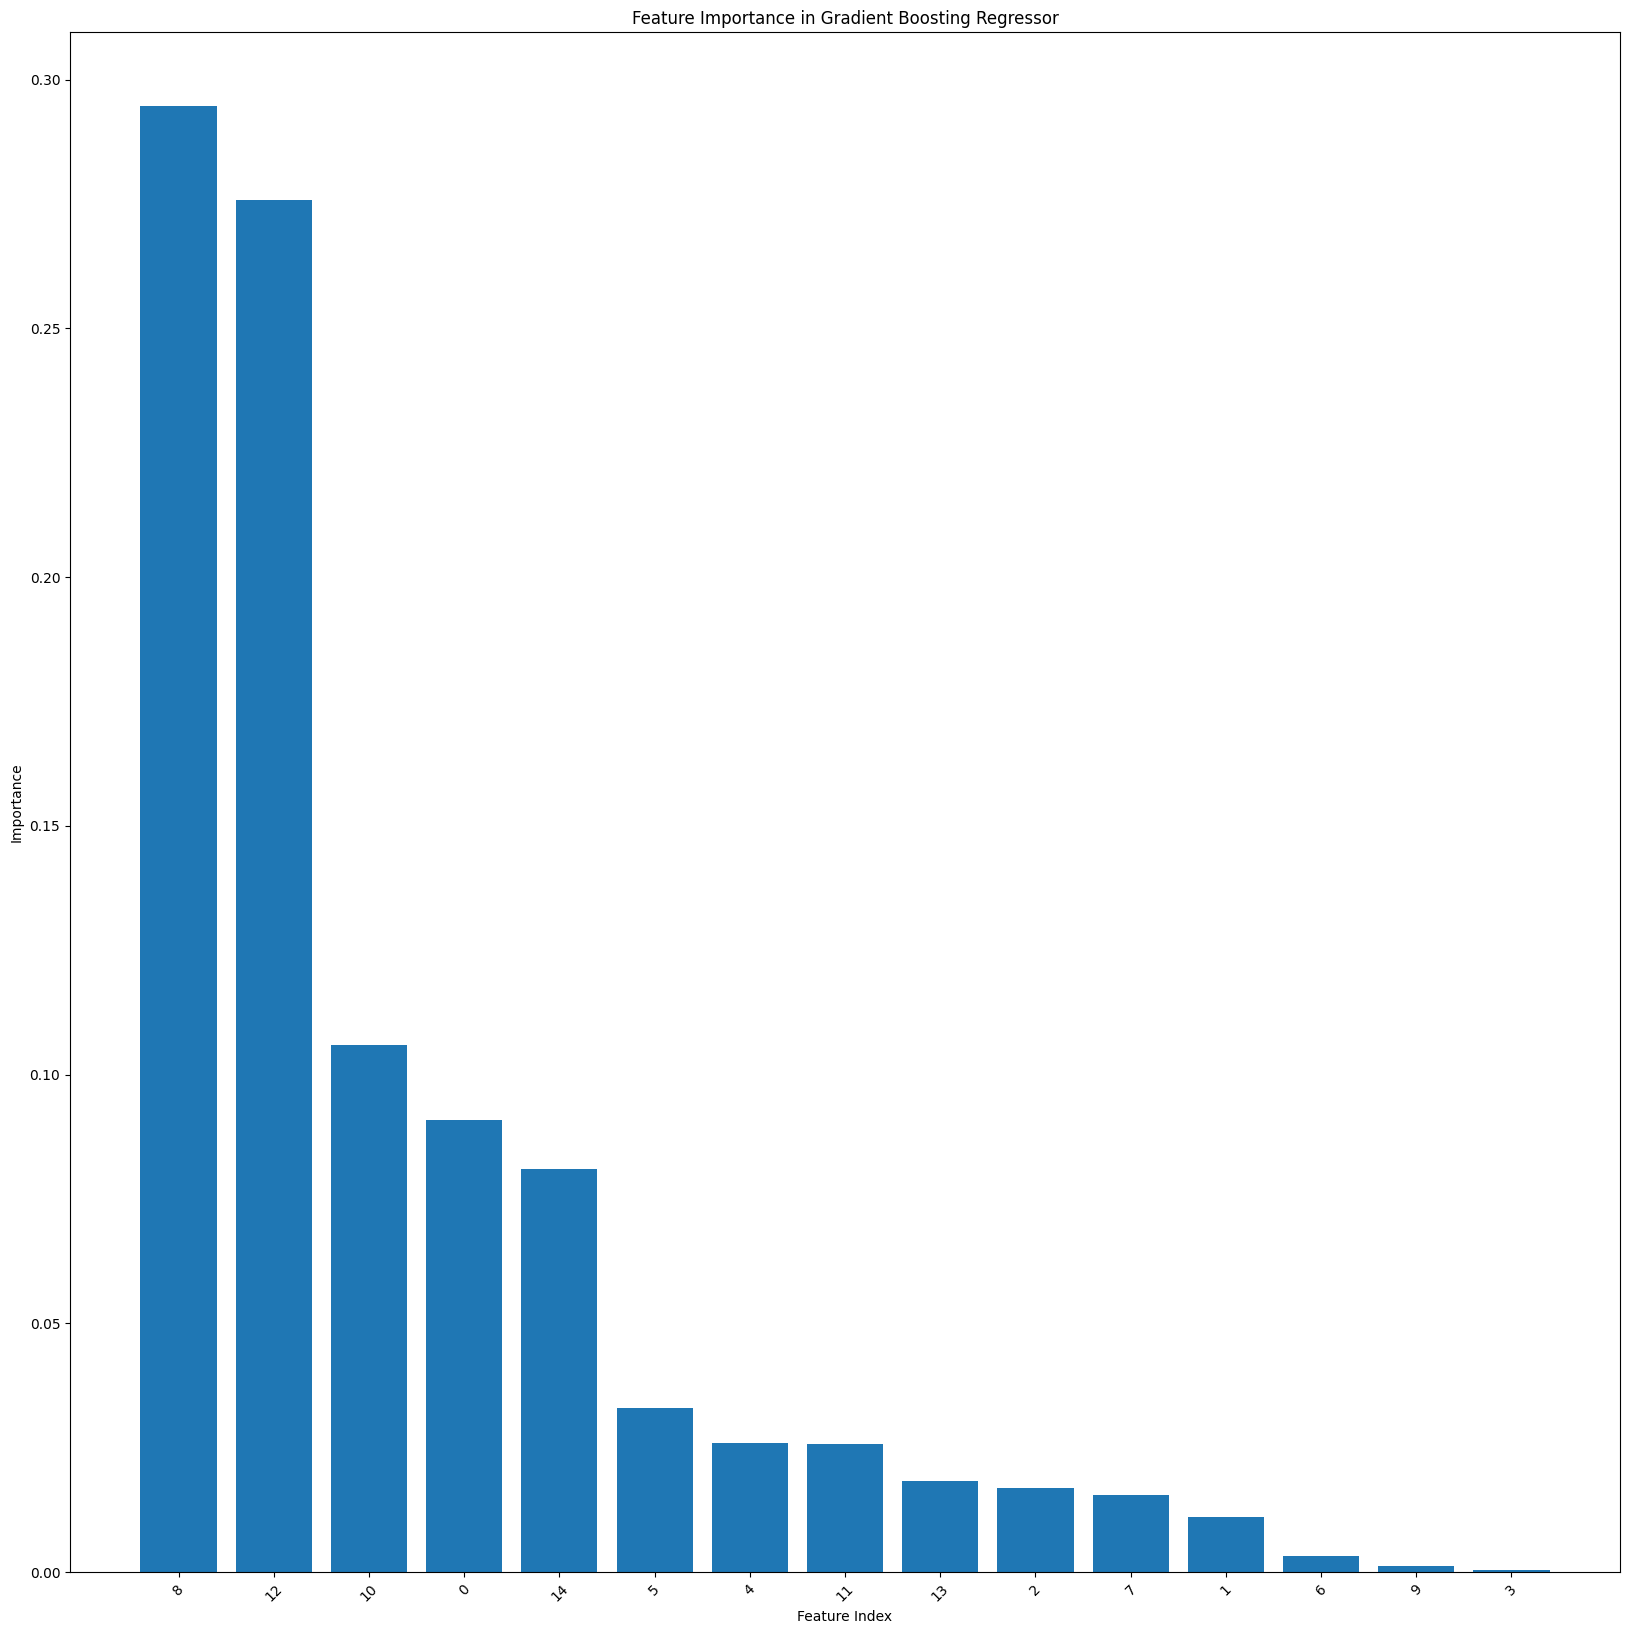

In [102]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import export_text

# Plot the first tree in the ensemble
tree_text = export_text(gb.estimators_[0, 0], feature_names=list(range(x_train.shape[1])))
print(tree_text)

# Plot feature importance
feature_importance = gb.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]

plt.bar(range(x_train.shape[1]), feature_importance[sorted_idx])
plt.xticks(range(x_train.shape[1]), sorted_idx, rotation=45)  # Use indices instead of column names
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importance in Gradient Boosting Regressor")
plt.show()

# XGBoost

In [82]:
import xgboost as xgb
rf= RandomizedSearchCV(xgb.XGBRegressor(random_state=1), {
    'n_estimators':[5,20,50,100,125,150],
    'max_depth':[2,5,7,10,12,15,20],
    'min_samples_leaf':[2,5,7,10,12,15],
    'learning_rate':[0.001,0.005,0.01,0.02,0.03,0.05,0.1,0.2,0.5,1,2],
    'gamma':[0.1,0.5,0,1,2,5,10,20,50],
    'lambda':[0.001,0.1,0.2,0.5,1,2,5,10]
}, cv=5, return_train_score=False)
rf.fit(x,y)
rf.cv_results_

C:\Users\ADMIN\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [18:01:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\xgb

{'mean_fit_time': array([23.57425814,  9.51655579,  0.80720854,  0.1341959 ,  1.85600553,
         0.06672888,  0.13624964,  3.72079816, 10.58185492,  0.10291629]),
 'std_fit_time': array([0.59763431, 0.53239575, 0.0411195 , 0.0084626 , 0.04409788,
        0.0053596 , 0.0032634 , 0.12940369, 0.63080377, 0.00407649]),
 'mean_score_time': array([0.02483172, 0.0185997 , 0.00475707, 0.00328903, 0.00962524,
        0.0037189 , 0.00585165, 0.01081138, 0.01680703, 0.00369935]),
 'std_score_time': array([0.00547295, 0.0085315 , 0.00258401, 0.00288492, 0.00130617,
        0.0021164 , 0.00228154, 0.00304719, 0.00511145, 0.00297476]),
 'param_n_estimators': masked_array(data=[150, 150, 150, 50, 125, 20, 50, 125, 125, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[7, 7, 5, 7, 5, 2, 12, 12, 15, 10],
              mask=[False, False, 

In [72]:
a6=pd.DataFrame(rf.cv_results_)
a6

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.145367      0.009937         0.004788        0.002118   
1       0.117680      0.009404         0.004595        0.001176   
2       0.947338      0.129253         0.006026        0.001047   
3       1.253206      0.107185         0.004380        0.002429   
4       0.586498      0.021648         0.004899        0.003356   
5       1.634433      0.039059         0.012662        0.003561   
6       4.695540      0.183153         0.008568        0.002211   
7       1.586159      0.121002         0.006961        0.002944   
8       1.929079      0.070357         0.009417        0.001113   
9       0.279446      0.001715         0.005836        0.000776   

  param_n_estimators param_min_samples_leaf param_max_depth  \
0                150                      7               2   
1                125                     15               2   
2                 50                     10              15   
3                 50                      5              12   
4                125                      2               7   
5                125                      5              10   
6                 50                      2              20   
7                 50                      2              12   
8                125                     12              10   
9                125                      7               5   

  param_learning_rate param_lambda param_gamma  \
0                 0.1           10          10   
1                 0.5          0.1          10   
2                   1            2           2   
3                0.03            2         0.1   
4                0.01            2         0.1   
5                 0.2          0.1           2   
6                 0.5            1           0   
7                0.05          0.5          10   
8                0.05            2         0.5   
9                0.01            5          50   

                                              params  split0_test_score  \
0  {'n_estimators': 150, 'min_samples_leaf': 7, '...          -1.819586   
1  {'n_estimators': 125, 'min_samples_leaf': 15, ...          -1.568342   
2  {'n_estimators': 50, 'min_samples_leaf': 10, '...          -0.991251   
3  {'n_estimators': 50, 'min_samples_leaf': 5, 'm...          -1.638622   
4  {'n_estimators': 125, 'min_samples_leaf': 2, '...          -2.693636   
5  {'n_estimators': 125, 'min_samples_leaf': 5, '...          -0.276902   
6  {'n_estimators': 50, 'min_samples_leaf': 2, 'm...          -1.132046   
7  {'n_estimators': 50, 'min_samples_leaf': 2, 'm...          -0.168231   
8  {'n_estimators': 125, 'min_samples_leaf': 12, ...          -0.705896   
9  {'n_estimators': 125, 'min_samples_leaf': 7, '...          -3.962963   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.576665           0.689405           0.609865           0.619904   
1           0.567966           0.695777           0.519000           0.777435   
2           0.282287           0.588309           0.558756           0.599324   
3           0.575220           0.585024           0.724263           0.640967   
4           0.499999           0.577353           0.692717           0.590317   
5           0.541919           0.711657           0.630783           0.676742   
6           0.521359           0.640236           0.590969           0.659095   
7           0.592166           0.670493           0.679281           0.690126   
8           0.544910           0.703682           0.702227           0.701648   
9           0.491129           0.530645           0.647787           0.500529   

   mean_test_score  std_test_score  rank_test_score  
0         0.135251        0.978107                8  
1         0.198367        0.888077                6  
2         0.207485        0.610659                5  
3         0.177371        0.909539                7  
4        -0.066650        1.3149

In [78]:
rf.best_params_

{'n_estimators': 50,
 'min_samples_leaf': 10,
 'max_depth': 5,
 'learning_rate': 0.5,
 'lambda': 5,
 'gamma': 50}

In [79]:
rf.best_score_

0.4722437868831631

In [83]:
xgb=xgb.XGBRegressor(random_state=1,max_depth=15,min_samples_leaf=5,n_estimators=50,learning_rate=0.5,reg_lambda=5,gamma=50).fit(x_train,y_train)
print("The accuracy of XGBosst Regreesion is:",xgb.score(x_valid,y_valid))

C:\Users\ADMIN\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


The accuracy of XGBosst Regreesion is: 0.9998873899691331


AttributeError: 'Axes' object has no attribute 'show'

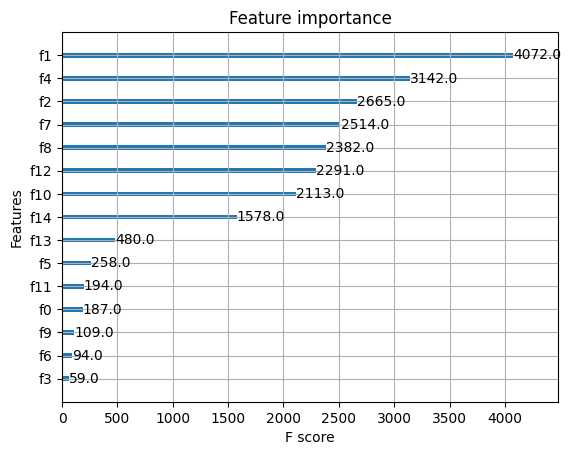

In [84]:
# Plot the graph for important feature
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
plot_importance(xgb)
plot.show()

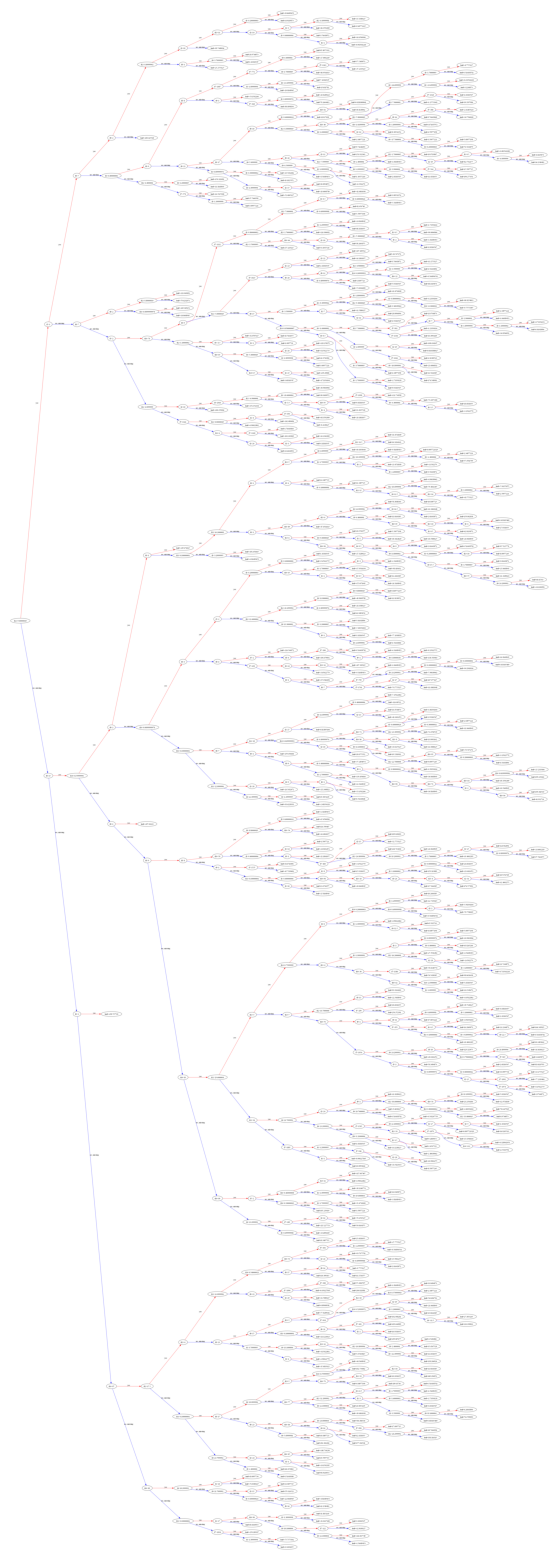

In [90]:
#Plotting tree of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt

# Set the figure size to a larger value
plt.rcParams['figure.figsize'] = [20, 20]

# Plot the first tree of the XGBoost model
plot_tree(xgb, num_trees=0, rankdir='LR')  # 'LR' for left to right layout
plt.show()


# Finall evaluation of best model on test data

In [91]:
print("The final accuracy of Gradient Boost Regreesion is:",gb.score(x_test,y_test))
print("The final accuracy of XGBosst Regreesion is:",xgb.score(x_test,y_test))

The final accuracy of Gradient Boost Regreesion is: 0.932681213664402
The final accuracy of XGBosst Regreesion is: 0.9306165895313016


# Conclusion

# The following observations were made after importing and analyzing the data :

Customers favour rental motorcycles equally in all seasons.

When there are no holidays, customers choose to rent motorcycles. Customers hardly ever use the bikes they rent while traveling on holiday.

Nearly all consumers preferred to rent bikes during functional hours.

Bicycle rentals are popular all month long.

Renting bicycles was not very popular in 2017, but it increased by 83.02 percent in 2018.

At night, customers do not prefer to use rented bikes.

Customers do not prefer rented bikes in the mornings 4 and 5, but from 7, 8, and 9, the use of rented bikes increases, possibly due to working people going to the office, and it is the same in the evenings 5, 6, and 7, because people are travelling from the office to home. Overall, the rented bike was the most frequently used during office in and out times.

Customers mostly use rented bikes for transportation in the evening.

Customers who travel most commonly use rented bikes in the morning at 8 a.m. and in the evening at 6 p.m.

When the humidity level is between 10% and 18%, people prefer to rent bikes.
wind speed is between 2 m/s and 3.5 m/s, people consistently use rented bikes, and it is at its peak when wind speed is normal, which is 3.2 m/s.

Renting a bike is the best option for customers in dew point temperatures ranging from 12°C to 18°C. The use of a rented bike increases with increasing dew point temperatures, but it still reaches normal dew point temperatures.


In the first 10 days of the month, most rented bikes ar used by customers. Customers consistently use rented bikes in the last 15 days of the month.

In June, most rented bikes are used through the year, followed by October. Customers' use of rent bikes is at its peak from April to September.

The count of rented bikes on that day is unaffected by the day's visibility, but when visibility exceeds 1750, use of rented bikes increases more than usual.

During the summer and autumn seasons, most people rent bikes. During the winter, fewer people choose to rent bikes.
Even when there is no holiday other than a holiday, people rent bikes. The use of rented bikes on holidays is lower than on non-holiday days.


The use of rented bikes increased by three times in 2018 compared to 2017.

# As a result of the model's high accuracy the XGBoost regression model and Gradient Boosting Regressor is the ideal and well-trained model for forecasting the number of rented bikes required per hour.*
